# Latar Belakang
Airbnb adalah sebuah platformyang menawarkan suatu tempat online yang memungkinkan para pengguna ("Anggota") untuk mempublikasikan, menawarkan, mencari, dan memesan layanan. Anggota yang mempublikasikan dan menawarkan layanan disebut "Tuan Rumah(Host)" dan Anggota yang mencari, memesan, atau menggunakan layanan disebut "Tamu(Guest)." Tuan rumah menawarkan akomodasi ("Akomodasi"), aktivitas, wisata/tur, dan acara ("Pengalaman"), serta berbagai layanan perjalanan dan lainnya (secara kolektif disebut, "Layanan Tuan Rumah", dan setiap penawaran Layanan Tuan Rumah, disebut "Iklan").

Airbnb mendapat keuntungan berdasarkan dari transaksi yang berhasil dilakukan melalui layanannya baik dari host fee maupun guest fee.Model bisnis airbnb yang berbasis layanan jasa penghubung antara host dan guest, maka untuk meningkatkan revenue perlu terjadi peningkatan transaksi pada layanan airbnb. Peningkatan transaksi ini dapat dipengaruhi dengan berbagai faktor, seperti sentimen, lokasi, harga dan sebagainya.

Bangkok sendiri merupakan salah satu destinasi wisata populer yang banyak dikunjungi baik dari turis yang berasal dari eropa, amerika ataupun asia sendiri. Baik itu karena wisata alam, budaya ataupun keunikan dari Bangkok itu sendiri. Pada studi kasus ini, akan dilakukan analisis pada airbnb Bangkok, Thailand.



# Referensi 
Data dihimpun dari listing airbnb bangkok selama 12 bulan pada tahun 2022, dan dapat diakses melalui link berikut :
https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF

# Pernyataan Masalah
Pada studi kasus ini akan fokus kepada peningkatan revenue dari jasa layanan airbnb dipengaruhi dari peningkatan transaksi yang dilakukan melalui airbnb, dimana jasa layanan tersebut merupakan jasa layanan penginapan yang dapat dipengaruhi berbagai faktor seperti diantaranya sentimen, lokasi, harga dan lain sebagainya dan berdasarkan hal ini maka akan dilakukan analisa faktor-faktor atau karakteristik yang berpengaruh kepada potensi peningkatan revenue airbnb berdasarkan transaksi yang dilakukan. 

Business problem: 
Berdasarkan hal tersebut perlu diketahui karakteristik dari data penginapan yang telah dikumpulkan(listing) untuk selanjutnya bisa merekomendasikan beberapa hal yang berpotensi meningkatkan revenue dan efisiensi pada program dan target marketing.

# Data

In [811]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind


import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/Users/ockydaniel/Desktop/Purwadhika/Capstone Project Module 2/Airbnb Bangkok Dataset/Airbnb Listings Bangkok.csv')

Berdasarkan dari dictionary dataset, ini berisi informasi mengenai karakteristik properti host, lokasi, jumlah review, ketersediaan, dan sebagainya. Terdapat 15 kolom di dalam dataset yang akan digunakan, antara lain:
* id: kode unik untuk setiap listing yang terdaftar di Airbnb
* name: nama dari listing
* host_id: kode unik untuk host
* host_name: nama host (biasanya nama pertama/nama depan)
* neighborhood: lokasi listing (sesuai informasi latitude dan longitude)
* latitude: informasi lokasi di peta
* longitude: informasi lokasi di peta
* room_type: tipe tempat tinggal yang ditawarkan (Private Room, Entire home/apt, Hotel room, Shared Room)
* price: harga dari listing menggunakan dengan nilai mata uang lokal.
* minimum_nights: jumlah hari minimal untuk menyewa listing
* number_of_reviews: jumlah review yang dimiliki listing
* last_review: tanggal dari review terbaru yang masuk
* calculated_host_listings_count: jumlah listing yang dimiliki host di suatu lokasi pada aplikasi Mybnb
* availability_365: Ketersediaan dari listing x hari kedepan
* number_of_reviews_ltm: Jumlah review yang dimiliki listing dalam 12 bulan terakhir

In [812]:
# Menampilkan 5 data teratas dan 5 data terbawah (Preview)
display(df.head(5),
df.tail(5))

Unnamed: 0      id                                            name  \
0  0           27934   Nice room with superb city view                  
1  1           27979   Easy going landlord,easy place                   
2  2           28745   modern-style apartment in Bangkok                
3  3           35780   Spacious one bedroom at The Kris Condo Bldg. 3   
4  4           941865  Suite Room 3 at MetroPoint                       

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0  120437   Nuttee      Ratchathewi   13.75983  100.54134  Entire home/apt   
1  120541   Emy         Bang Na       13.66818  100.61674  Private room      
2  123784   Familyroom  Bang Kapi     13.75232  100.62402  Private room      
3  153730   Sirilak     Din Daeng     13.78823  100.57256  Private room      
4  610315   Kasem       Bang Kapi     13.76872  100.63338  Private room      

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0  1905   3               65                 2020-01-06  0.50                
1  1316   1               0                  NaN        NaN                  
2  800    60              0                  NaN        NaN                  
3  1286   7               2                  2022-04-01  0.03                
4  1905   1               0                  NaN        NaN                  

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0  2                               353               0                      
1  2                               358               0                      
2  1                               365               0                      
3  1                               323               1                      
4  3                               365               0

Unnamed: 0                  id  \
15849  15849       790465040741092826   
15850  15850       790474503157243541   
15851  15851       790475335086864240   
15852  15852       790475546213717328   
15853  15853       790476492384199044   

                                                     name    host_id  \
15849  素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街       94899359    
15850  Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea  491526222   
15851  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   491526222   
15852  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   491526222   
15853  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   491526222   

       host_name neighbourhood   latitude   longitude     room_type  price  \
15849  Renee      Pra Wet       13.715132  100.653458  Private room  2298    
15850  Phakhamon  Ratchathewi   13.753052  100.538738  Private room  1429    
15851  Phakhamon  Ratchathewi   13.753169  100.538700  Private room  1214    
15852  Phakhamon  Ratchathewi   13.754789  100.538757  Private room  1214    
15853  Phakhamon  Ratchathewi   13.752960  100.540820  Private room  1214    

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
15849  28              0                  NaN        NaN                  
15850  1               0                  NaN        NaN                  
15851  1               0                  NaN        NaN                  
15852  1               0                  NaN        NaN                  
15853  1               0                  NaN        NaN                  

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
15849  1                               362               0                      
15850  14                              365               0                      
15851  14                              365               0                      
15852  14                              365               0                      
15853  14                              365               0

# Data Understanding and Cleaning

Tahap berikutnya adalah Data Understanding and Cleaning. Disini kita akan mencoba memahami dengan melihat kelengkapan data, statistika deskriptif dari data, mengidentifikasi missing values dan data duplikat, berikutnya menanganinya dengan mengganti nilai atau menghapus baris atau kolom yang dirasa kurang relevan untuk kebutuhan analisis, serta penanganan data duplikat.

In [813]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15854 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

Data Kategori:
* room_type
* name
* host_name
* neighbourhood
* last_review

Data Numerik:
* Unnamed
* id 
* host_id 
* latitude 
* longitude 
* price
* minimum_nights 
* number_of_reviews 
* reviews_per_month 
* calculated_host_listing_count 
* availability_365 
* number_of_reviews_ltm 


Dapat dilihat bahwa data yang dimiliki berdimensi `15854` baris dan `17 kolom`. Terdapat kekeliruan yaitu variabel `Unnamed`, yang berikutnya akan dihapus karena tidak relevan untuk keperluan analisa berikutnya dan tipe data pada variabel `last_review`, dimana seharusnya tipe data variabel tersebut adalah datetime. 

In [814]:
# Cek kelengkapan data
df.isna().sum()

Unnamed: 0                        0   
id                                0   
name                              8   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [815]:
# Statistika Deskriptif
display(df.describe(), df.describe(include='object'))

Unnamed: 0            id       host_id      latitude     longitude  \
count  15854.000000  1.585400e+04  1.585400e+04  15854.000000  15854.000000   
mean   7926.500000   1.579397e+17  1.541058e+08  13.745144     100.559903     
std    4576.799919   2.946015e+17  1.318726e+08  0.043040      0.050911       
min    0.000000      2.793400e+04  5.892000e+04  13.527300     100.329550     
25%    3963.250000   2.104509e+07  3.974431e+07  13.720090     100.529690     
50%    7926.500000   3.503734e+07  1.224556e+08  13.738490     100.561415     
75%    11889.750000  5.256154e+07  2.390547e+08  13.759497     100.585150     
max    15853.000000  7.908162e+17  4.926659e+08  13.953540     100.923440     

              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  1.585400e+04  15854.000000    15854.000000       10064.000000        
mean   3.217704e+03  15.292355       16.654157          0.813145            
std    2.497212e+04  50.815020       40.613331          1.090196            
min    0.000000e+00  1.000000        0.000000           0.010000            
25%    9.000000e+02  1.000000        0.000000           0.120000            
50%    1.429000e+03  1.000000        2.000000           0.435000            
75%    2.429000e+03  7.000000        13.000000          1.060000            
max    1.100000e+06  1125.000000     1224.000000        19.130000           

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count  15854.000000                    15854.000000      15854.000000           
mean   13.889618                       244.378643        3.481519               
std    30.269848                       125.843224        8.916937               
min    1.000000                        0.000000          0.000000               
25%    1.000000                        138.000000        0.000000               
50%    4.000000                        309.000000        0.000000               
75%    13.000000                       360.000000        3.000000               
max    228.000000                      365.000000        325.000000

name host_name  \
count   15846                                             15854      
unique  14794                                             5313       
top     New!  La Chada Night Market studio 2PPL near MRT  Curry      
freq    45                                                228        

       neighbourhood        room_type last_review  
count   15854         15854            10064       
unique  50            4                1669        
top     Vadhana       Entire home/apt  2022-12-11  
freq    2153          8912             189

Dari informasi statistika deskriptif diatas dapat kita lihat terdapat anomali pada beberapa variabel seperti pada `price`, `minimum_nights` dan variabel lainnya, antara lain:
- Contohnya pada variabel price jika kita perhatikan pada nilai pada nilai minimumnya adalah 0, ini tidak masuk akal mengingat tidak mungkin penginapan menawarkan harga 0(gratis)
- Pada nilai maksimum memiliki gap tiga kali lipat dari pada 75% sebaran value(Q3) nya yang mana antara minimum sampai Q3 nya saja bahkan tidak sampai dua kali lipat.
- Hal yang sama juga terjadi pada variabel `number_of_reviews` pada hubungan75% sebaran value(Q3) dan nilai maksimumnya. 

In [816]:
# Melakukan filter untuk nilai maksimum pada kolom 'price'
min_price_data = df[df['price'] == 0.000000e+00]

# Menampilkan data yang telah difilter
min_price_data

Unnamed: 0        id                           name    host_id  \
11103  11103       44563108  Somerset Maison Asoke Bangkok  360620448   

                   host_name neighbourhood  latitude  longitude   room_type  \
11103  Somerset Maison Asoke  Vadhana       13.73815  100.5642   Hotel room   

       price  minimum_nights  number_of_reviews last_review  \
11103  0      1               0                  NaN          

       reviews_per_month  calculated_host_listings_count  availability_365  \
11103 NaN                 1                               0                  

       number_of_reviews_ltm  
11103  0

In [817]:
# Melakukan filter untuk nilai maksimum pada kolom 'price'
max_price_data = df[df['price'] == 1100000]

# Menampilkan data yang telah difilter
max_price_data


Unnamed: 0                  id                                   name  \
12868  12868       635676064543597376  New 1 bedroom apartment BTS MRT Asoke   

        host_id host_name neighbourhood   latitude   longitude  \
12868  12464705  Lucio     Vadhana       13.742186  100.560394   

             room_type    price  minimum_nights  number_of_reviews  \
12868  Entire home/apt  1100000  14              0                   

      last_review  reviews_per_month  calculated_host_listings_count  \
12868  NaN        NaN                 1                                

       availability_365  number_of_reviews_ltm  
12868  365               0

In [818]:
# Melakukan filter untuk nilai maksimum pada kolom 'price'
max_mn_data = df[df['minimum_nights'] == 1125]

# Menampilkan data yang telah difilter
max_mn_data

Unnamed: 0       id                                               name  \
61  61          1041976  Long-stay special rate spacious entire floor Siam   

    host_id host_name neighbourhood  latitude  longitude        room_type  \
61  5735895  Pariya    Parthum Wan   13.74814  100.52016  Entire home/apt   

    price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
61  2900   1125            295                2021-08-21  2.61                

    calculated_host_listings_count  availability_365  number_of_reviews_ltm  
61  3                               0                 0

In [819]:
pd.set_option('display.max_colwidth', -1)
# Cek data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   Unnamed: 0                      15854              
1   id                              15854              
2   name                            14794              
3   host_id                         6659               
4   host_name                       5313               
5   neighbourhood                   50                 
6   latitude                        9606               
7   longitude                       10224              
8   room_type                       4                  
9   price                           3040               
10  minimum_nights                  86                 
11  number_of_reviews               298                
12  last_review                     1669               
13  reviews_per_month               513                
14  calculated_host_listings_count  50                 
15  availability_365                366                
16  number_of_reviews_ltm           85                 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Secara umum, dapat dilihat bahwa:
* Dataset airbnb Bangkok memiliki total 17 kolom dan 15.854 baris
* Kolom `price` memiliki 1 data minimum yang bernilai 0. Diasumsikan akibat kesalahan input.
* Pada kolom name jumlah baris tidak sesuai dengan baris maksimum kemungkinan diakibatkan error pada saat input data
* Lokasi listing (neighbourhood) berada di 50 tempat yang berbeda di Bangkok
* Jumlah listing yang dimiliki Host yang sama di daerah Bangkok beragam jumlahnya mulai dari 1 sampai 228
* Jika dilihat kolom `name`, `last_review` dan kolom `reviews_per_month` memiliki value tidak sampai 15.854 baris mengindikasikan ada data yang kosong

# Missing Value

Berikutnya kita akan cek missing value beserta sebarannya dan lanjut menangani missing value tersebut.

In [820]:
# Melihat missing value pada setiap kolom di dataset
df.isna().sum()

Unnamed: 0                        0   
id                                0   
name                              8   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [821]:
# Persentase missing value di setiap kolom
df.isna().sum()/df.shape[0]*100

Unnamed: 0                        0.000000 
id                                0.000000 
name                              0.050460 
host_id                           0.000000 
host_name                         0.000000 
neighbourhood                     0.000000 
latitude                          0.000000 
longitude                         0.000000 
room_type                         0.000000 
price                             0.000000 
minimum_nights                    0.000000 
number_of_reviews                 0.000000 
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count    0.000000 
availability_365                  0.000000 
number_of_reviews_ltm             0.000000 
dtype: float64

<Axes: >

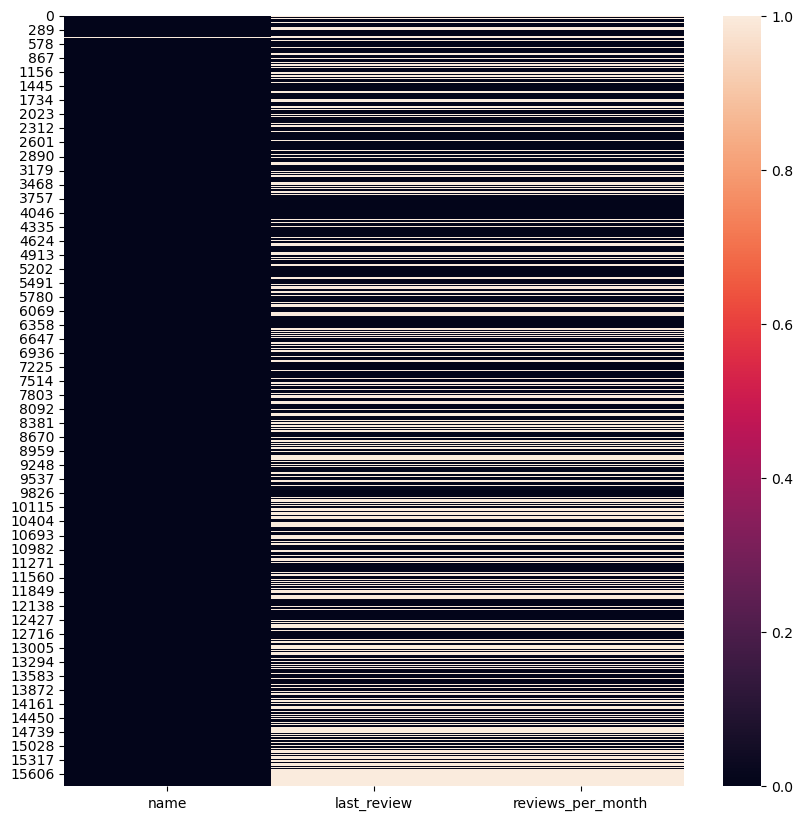

In [822]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','last_review','reviews_per_month']].isna())

Secara garis besar:  
* *missing value* di kolom `name` memiliki proporsi yang sangat kecil (0.050460)
* *missing value* di kolom `last_review` memiliki proporsi yang sangat tinggi (36.520752)
* *missing value* di kolom `last_review` berkaitan dengan kolom `number_of_reviews`. Jika data di `number_of_reviews` bernilai 0 (tidak ada review), maka  data di `last_review` akan kosong.  
* *missing value* di kolom `reviews_per_month` memiliki proporsi yang sama dengan kolom `last_review`(36.520752) karena kolom `reviews_per_month` kolom yang berkaitan dengan kolom `last_review`.

Ada 2 cara untuk menangani *missing value*:
* Pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini umumnya tidak disarankan apabila jumlah missing value tergolong cukup tinggi (dalam kasus ini mencapai kurang lebih 36% dari data).

* Kedua, mengisi data yang hilang. Cara ini pada umumnya lebih disarankan karena tidak mengurangi jumlah data. Cara ini dapat digunakan untuk kolom `name` yang kosong karena nama yang kosong diasumsikan sebagai kesalahan input yang dapat ditolerir. kolom `last_review` juga akan diisikan nilai yang menunjukkan tidak adanya data (bukan NaN).


Berikutnya mari kita lanjut melihat lebih detail kolom-kolom yang disebutkan secara garis besar sebelumnya

In [823]:
# Data yang memiliki nilai kosong pada 'name'
df_noname = df[df['name'].isna() == True]
df_noname[['name', 'host_name', 'number_of_reviews']]

name        host_name  number_of_reviews
439   NaN  Titawan          0                
544   NaN  Cherry           0                
572   NaN  Parichart        0                
669   NaN  Chira            0                
1030  NaN  Nantida          0                
1282  NaN  Diamond Bangkok  6                
1594  NaN  Khaneungnit      0                
2075  NaN  Pakaphol         2

Disini dapat kita lihat pada kolom host_name `Diamond Bangkok` dan `Pakhapol` memiliki nilai pada jumlah review nya, menandakan bahwa bahwa pernah ada transaksi pada penginapan tersebut yang menghasilkan review walaupun tidak memiliki nama. Ini juga mengindikasikan kesalahan pada saat penginputan dan ada kemungkinan tidak wajib untuk mendaftarkan nama listing di layanan airbnb. 

Kita lanjut melihat variabel yang saling terkait oleh missing values

In [824]:
# Hubungan number_of_reviews, last_review dan reviews_per_month
df[df['number_of_reviews'] != 0][['number_of_reviews', 'last_review','reviews_per_month']]

number_of_reviews last_review  reviews_per_month
0      65                 2020-01-06  0.50             
3      2                  2022-04-01  0.03             
5      19                 2017-08-03  0.17             
6      1                  2014-02-03  0.01             
8      10                 2016-03-29  0.09             
...    ..                        ...   ...             
15712  1                  2022-12-25  1.00             
15728  1                  2022-12-26  1.00             
15743  3                  2022-12-24  3.00             
15744  3                  2022-12-28  3.00             
15796  2                  2022-12-28  2.00             

[10064 rows x 3 columns]

In [825]:
# Hubungan number_of_reviews, last_review dan reviews_per_month
df[df['number_of_reviews'] == 0][['number_of_reviews', 'last_review','reviews_per_month']]

number_of_reviews last_review  reviews_per_month
1      0                  NaN        NaN               
2      0                  NaN        NaN               
4      0                  NaN        NaN               
7      0                  NaN        NaN               
14     0                  NaN        NaN               
...   ..                  ...         ..               
15849  0                  NaN        NaN               
15850  0                  NaN        NaN               
15851  0                  NaN        NaN               
15852  0                  NaN        NaN               
15853  0                  NaN        NaN               

[5790 rows x 3 columns]

* Dengan melihat data diatas dapat dikatakan data kosong pada last_review adalah karena listing memang belum pernah mendapat review (number_of_reviews = 0), begitu juga dengan reviews_per_month dikarenakan saling berkaitan.

Kita telah melihat preview dari data kita beserta anomalinya, berikutnya kita akan handling missing values pada kolom `name` ,`last_review`, dan drop kolom yang tidak relevan untuk kebutuhan analisis yaitu kolom `Unnamed` yang merupakan kolom berisi index, `reviews_per_month`, dan nilai 0 pada kolom `price`.

`name` dan `last_review`
Mengubah data kosong di kolom `name` menjadi '-' dan data kosong di kolom `last_review` menjadi '-'

In [827]:
# Mengganti nilai kosong pada kolom name menjadi '-'
df['name'].fillna('-', inplace = True)
df[df['name'] == '-']

Unnamed: 0        id name   host_id        host_name neighbourhood  \
439   439         4549768   -    18852579  Titawan          Phra Khanong   
544   544         4720818   -    24386225  Cherry           Din Daeng      
572   572         4245018   -    22030043  Parichart        Bang Phlat     
669   669         6148415   -    31895202  Chira            Bang Na        
1030  1030        8055144   -    42521288  Nantida          Vadhana        
1282  1282        10000742  -    51374914  Diamond Bangkok  Ratchathewi    
1594  1594        10710165  -    55347997  Khaneungnit      Vadhana        
2075  2075        13142743  -    73275200  Pakaphol         Khlong Toei    

      latitude  longitude        room_type  price  minimum_nights  \
439   13.69406  100.59619  Private room     1080   5                
544   13.77562  100.57346  Private room     1200   1                
572   13.78376  100.49821  Private room     1200   1                
669   13.68276  100.60894  Entire home/apt  2424   2                
1030  13.74126  100.55761  Private room     5000   3                
1282  13.75328  100.52928  Private room     930    1                
1594  13.71757  100.60464  Private room     1000   1                
2075  13.72566  100.56416  Private room     850    1                

      number_of_reviews last_review  reviews_per_month  \
439   0                  NaN        NaN                  
544   0                  NaN        NaN                  
572   0                  NaN        NaN                  
669   0                  NaN        NaN                  
1030  0                  NaN        NaN                  
1282  6                  2017-05-13  0.07                
1594  0                  NaN        NaN                  
2075  2                  2017-12-11  0.03                

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  
439   1                               365               0                      
544   1                               365               0                      
572   1                               365               0                      
669   1                               365               0                      
1030  1                               365               0                      
1282  1                               365               0                      
1594  1                               365               0                      
2075  3                               220               0

In [828]:
# Mengganti nilai kosong pada 'last_review' menjadi '-'
df['last_review'].fillna('-', inplace = True)
df[df['last_review'] == '-'][['number_of_reviews', 'last_review']]

number_of_reviews last_review
1      0                  -         
2      0                  -         
4      0                  -         
7      0                  -         
14     0                  -         
...   ..                 ..         
15849  0                  -         
15850  0                  -         
15851  0                  -         
15852  0                  -         
15853  0                  -         

[5790 rows x 2 columns]

In [829]:
# Mengganti sementara kolom reviews_per_month menjadi '-'
df['reviews_per_month'].fillna('-', inplace = True)
df[df['reviews_per_month'] == '-'][['last_review', 'reviews_per_month']]

last_review reviews_per_month
1      -           -               
2      -           -               
4      -           -               
7      -           -               
14     -           -               
...   ..          ..               
15849  -           -               
15850  -           -               
15851  -           -               
15852  -           -               
15853  -           -               

[5790 rows x 2 columns]

In [830]:
# Melakukan pengecekan missing value, dapat dilihat tidak ada lagi missing value
df.isna().sum()

Unnamed: 0                        0
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [831]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15854 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15854 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [832]:
# Berikutnya akan menghapus beberapa kolom yang dirasa kurang relevan untuk kebutuhan analisis.
df.drop(columns=['Unnamed: 0','reviews_per_month'],inplace=True)

In [833]:
# Menghapus nilai 0 pada kolom price
df.drop(11103, inplace = True)

In [834]:
# Cek duplikasi dalam data
df.duplicated().value_counts()

False    15853
dtype: int64

In [835]:
# Reset index setelah drop baris
df.set_index('name', inplace = True)
df.reset_index(inplace = True)

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, berikutnya, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [836]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(15853, 15)


dataFeatures dataType  null  unique  \
0   name                            object   0     14794    
1   id                              int64    0     15853    
2   host_id                         int64    0     6658     
3   host_name                       object   0     5312     
4   neighbourhood                   object   0     50       
5   latitude                        float64  0     9606     
6   longitude                       float64  0     10224    
7   room_type                       object   0     4        
8   price                           int64    0     3039     
9   minimum_nights                  int64    0     86       
10  number_of_reviews               int64    0     298      
11  last_review                     object   0     1670     
12  calculated_host_listings_count  int64    0     50       
13  availability_365                int64    0     366      
14  number_of_reviews_ltm           int64    0     85       

                                                                                uniqueSample  
0   [Tranquility found in busy Bangkok near new skytran, Comfort and Safe Ratchadapisek MRT]  
1   [42984134, 12878566]                                                                      
2   [53105551, 110568332]                                                                     
3   [Toby, Chanzhang]                                                                         
4   [Bang Phlat, Bang Khae]                                                                   
5   [13.7305, 13.75613]                                                                       
6   [100.62758, 100.45026]                                                                    
7   [Hotel room, Shared room]                                                                 
8   [1843, 520]                                                                               
9   [183, 12]                                                                                 
10  [278, 158]                                                                                
11  [2022-04-18, 2020-04-30]                                                                  
12  [228, 33]                                                                                 
13  [81, 232]                                                                                 
14  [68, 277]

Sebelum dibersihkan, data memiliki 15 kolom dan 15854 baris dengan 6 nilai kosong pada kolom `name` dan 5790 nilai kosong pada kolom `last_review`, serta 1 nilai 0 pada kolom `price`.

Setelah dibersihkan, jumlah baris berkurang 1 menjadi 15853 dan jumlah kolom menjadi 13 (menghilangkan kolom `id`, `host_id`,`reviews_per_month` dan `Unnamed: 0`). Nilai kosong dan duplikat juga sudah tidak ada pada data

# Outliers

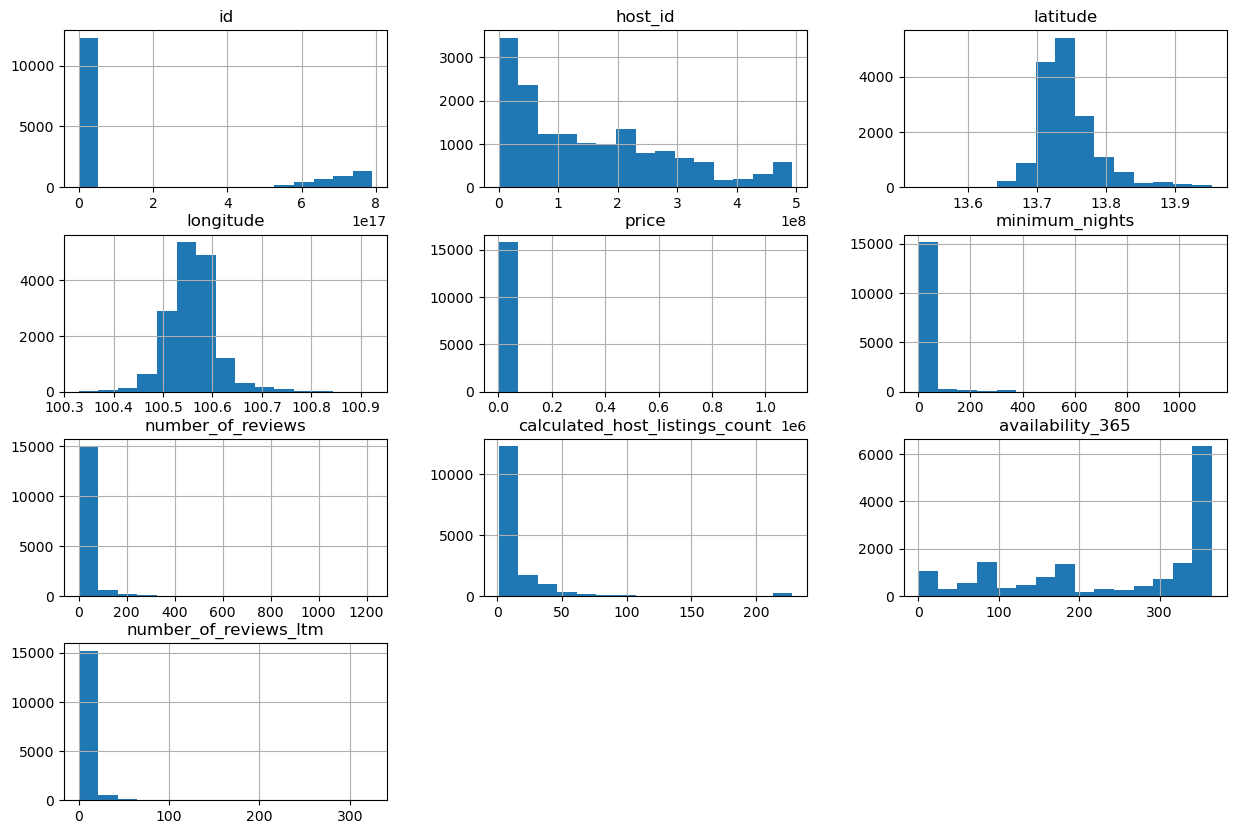

In [837]:
# Cek distribusi data pada data numerik
df.hist(bins=15, figsize=(15,10));

* Pada histogram diatas dapat dilihat beberapa variabel tidak terdistribusi dengan normal ini juga akan menjadi acuan dalam menentukan jenis metode korelasi yang akan digunakan dalam analisis ini.


In [838]:
df.describe()

id       host_id      latitude     longitude         price  \
count  1.585300e+04  1.585300e+04  15853.000000  15853.000000  1.585300e+04   
mean   1.579496e+17  1.540928e+08  13.745144     100.559903    3.217907e+03   
std    2.946082e+17  1.318666e+08  0.043041      0.050912      2.497290e+04   
min    2.793400e+04  5.892000e+04  13.527300     100.329550    2.780000e+02   
25%    2.104509e+07  3.974431e+07  13.720090     100.529690    9.000000e+02   
50%    3.503224e+07  1.224556e+08  13.738490     100.561410    1.429000e+03   
75%    5.256284e+07  2.390274e+08  13.759500     100.585150    2.429000e+03   
max    7.908162e+17  4.926659e+08  13.953540     100.923440    1.100000e+06   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
count  15853.000000    15853.000000       15853.000000                     
mean   15.293257       16.655207          13.890431                        
std    50.816496       40.614397          30.270630                        
min    1.000000        0.000000           1.000000                         
25%    1.000000        0.000000           1.000000                         
50%    1.000000        2.000000           4.000000                         
75%    7.000000        13.000000          13.000000                        
max    1125.000000     1224.000000        228.000000                       

       availability_365  number_of_reviews_ltm  
count  15853.000000      15853.000000           
mean   244.394058        3.481738               
std    125.832224        8.917176               
min    0.000000          0.000000               
25%    138.000000        0.000000               
50%    309.000000        0.000000               
75%    360.000000        3.000000               
max    365.000000        325.000000

Beberapa informasi yang kita peroleh adalah:

* Q3 pada variabel **price** memiliki `2.429000e+03(24,290)` Baht, tetapi pada maksimumnya memiliki harga `1.100000e+06(1,100,000)` Baht. Sangat jelas terdapat outliers disini.
* Q3 pada variabel **minimum_nights** memiliki nilai 7 malam dan nilai maksimumnya 1125 malam.dan lagi sangat jelas terdapat outliers disini.
* Mungkin jika ditelusuri lebih lanjut variabel lain seperti `number_of_reviews, reviews_per_month, calculated_host_listings_count, dan number_of_reviews_ltm` juga memiliki outliers.
* Pada analisis ini identifikasi outliers berguna sebagai acuan untuk menggunakan median daripada mean, dikarenakan median lebih tahan terhadap pengaruh outliers. Berikut referensi tentang menggunakan mean, median dan modus (central tendency) terhadap outliers https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3157145/#ref4

# Data Analysis

Kita telah melakukan Data Understanding and Cleaning. Berikutnya data ini akan digunakan untuk mencoba menjawab business problem dengan melihat gambaran dan karakteristik yang berpengaruh dan berpotensi untuk meningkatkan transaksi dan revenue. Beberapa pendekatan yaitu dengan mencoba fokus pada `jenis kamar` yang paling banyak diminati berdasarkan review dan membandingkan fitur-fitur lain yang tersedia agar bisa melihat gambaran dan karakteristik dari behaviour untuk berikutnya bisa merekomendasikan strategi target marketing untuk meningkatkan revenue. 







In [840]:
df2 = df

# Pendekatan Lokasi

Mari kita awali analisis melalui pendekatan lokasi.

In [841]:
distrik =pd.DataFrame(data=df2.groupby('neighbourhood').count()['id']).reset_index()


In [842]:
fig = px.bar(distrik,
             x = 'neighbourhood', 
             y= 'id',
             title = 'Jumlah Listing Airbnb di setiap distrik Bangkok',
             text='id',
             labels={'id':'Jumlah Listing Airbnb',
             'neighbourhood':'Distrik'},
             color='id')

fig.update_layout(xaxis = {'categoryorder':'total ascending'})

fig.update_traces(textfont_size=11, textangle=0, textposition='outside', cliponaxis=False)

fig.show()


In [843]:
import folium
bangkok = r'/Users/ockydaniel/Desktop/Purwadhika/Capstone Project Module 2/Bangkok-districts.geojson'
bangkok_loc = [13.7563,100.5018]

In [844]:
fig = px.choropleth_mapbox(distrik, geojson=bangkok, color='id',
                           locations='neighbourhood', featureidkey='properties.dname_e',
                           center={'lat': 13.7563, 'lon': 100.5018},
                           mapbox_style='carto-positron', zoom=9,
                           labels={'id':'Jumlah Penginapan Airbnb',
                                    'neighbourhood': 'distrik'})
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

Gambaran umum penginapan di bangkok:
- Airbnb bangkok sudah ada penginapan (listing) diseluruh distrik Bangkok.
- Sebaran jumlah penginapan terbanyak cenderung berada di daerah pusat Bangkok. 
Berikutnya kita akan coba melihat lebih jauh top 10 lokasi bedasarkan review terbanyak.


In [845]:
# Menampilkan 10 lokasi yang memiliki jumlah review terbanyak
df_lokasi_sum = df.groupby('neighbourhood')[['number_of_reviews']].sum().reset_index()
df_lokasi_sum.sort_values(by = ['number_of_reviews'], ascending = False, inplace = True)
top_10_sum = df_lokasi_sum.head(10)
top_10_sum.set_index('neighbourhood', inplace = True)
top_10_sum.reset_index(inplace = True)
top_10_sum

neighbourhood  number_of_reviews
0  Khlong Toei   41281            
1  Vadhana       37415            
2  Sathon        22242            
3  Ratchathewi   20698            
4  Huai Khwang   18145            
5  Bang Rak      17654            
6  Phaya Thai    13659            
7  Parthum Wan   9103             
8  Chatu Chak    8218             
9  Phra Nakhon   8142

In [846]:
bangkok = r'/Users/ockydaniel/Desktop/Purwadhika/Capstone Project Module 2/Bangkok-districts.geojson'
bangkok_loc = [13.7563,100.5018]

bangkok_map = folium.Map(location=bangkok_loc, 
                         zoom_start=12, 
                         dragging=False,
                         min_zoom=10,
                         max_zoom=10,
                         )

folium.Choropleth(geo_data=bangkok,
                  data= top_10_sum,
                  columns= ['neighbourhood', 'number_of_reviews'],
                  key_on= 'feature.properties.dname_e',
                  fill_color='RdYlGn',
                  fill_opacity=0.7,
                  legend_name='Top 10 Lokasi Berdasarkan 12 Bulan Terakhir',
                  ).add_to(bangkok_map)

bangkok_map

- Dapat kita lihat dari sebaran penginapan airbnb Bangkok di top 10 lokasi berdasarkan review juga cenderung berada daerah pusat Bangkok.
- Artinya dari sini kita bisa kita bisa melihat bahwa jumlah penginapan berbanding lurus dengan jumlah review.

In [847]:
# Menampilkan 10 lokasi yang memiliki jumlah review dalam 12 bulan terakhir terbanyak
df_lokasi_sum1 = df.groupby('neighbourhood')[['number_of_reviews_ltm']].sum().reset_index()
df_lokasi_sum1.sort_values(by = ['number_of_reviews_ltm'], ascending = False, inplace = True)
top_10_sum1 = df_lokasi_sum1.head(10)
top_10_sum1.set_index('neighbourhood', inplace = True)
top_10_sum1.reset_index(inplace = True)
top_10_sum1

neighbourhood  number_of_reviews_ltm
0  Khlong Toei   13601                
1  Vadhana       9709                 
2  Ratchathewi   4455                 
3  Bang Rak      3420                 
4  Sathon        3232                 
5  Huai Khwang   2557                 
6  Phaya Thai    2059                 
7  Phra Nakhon   1799                 
8  Din Daeng     1756                 
9  Parthum Wan   1670

In [848]:
bangkok = r'/Users/ockydaniel/Desktop/Purwadhika/Capstone Project Module 2/Bangkok-districts.geojson'
bangkok_loc = [13.7563,100.5018]

bangkok_map = folium.Map(location=bangkok_loc, 
                         zoom_start=12, 
                         dragging=False,
                         min_zoom=10,
                         max_zoom=10,
                         )

folium.Choropleth(geo_data=bangkok,
                  data= top_10_sum1,
                  columns= ['neighbourhood', 'number_of_reviews_ltm'],
                  key_on= 'feature.properties.dname_e',
                  fill_color='RdYlGn',
                  fill_opacity=0.7,
                  legend_name='Top 10 Lokasi Berdasarkan 12 Bulan Terakhir',
                  ).add_to(bangkok_map)

bangkok_map

Bahkan berdasarkan review terbanyak 12 Bulan terakhir tetap konsisten di area pusat kota bangkok.

Berikutnya mari kita akan coba melihat jenis kamar di top 10 lokasi tersebut.

In [849]:
# Melakukan penggabungan berdasarkan kolom 'neighbourhood'
top_10_room_type_merged = pd.merge(top_10_sum, df[['neighbourhood', 'room_type']], on='neighbourhood', how='left')

# Menampilkan hasil penggabungan
top_10_sum_merge = top_10_room_type_merged.value_counts()
top_10_room_type_sorted = top_10_sum_merge.sort_index(level=['number_of_reviews', 'neighbourhood'], ascending=[False, True])




In [850]:
top_10_room_type_sorted_reset = top_10_room_type_sorted.reset_index(name='jumlah')  # Mengatur ulang indeks dan memberi nama kolom baru 'jumlah'
top_10_room_type = top_10_room_type_sorted_reset  # Menyimpan hasil ke dalam variabel top_10_room

# Mengubah nama kolom '0' menjadi 'jumlah' menggunakan rename()
top_10_room_type = top_10_room_type.rename(columns={'0': 'jumlah'})  # Atau dapat dilakukan di baris ini



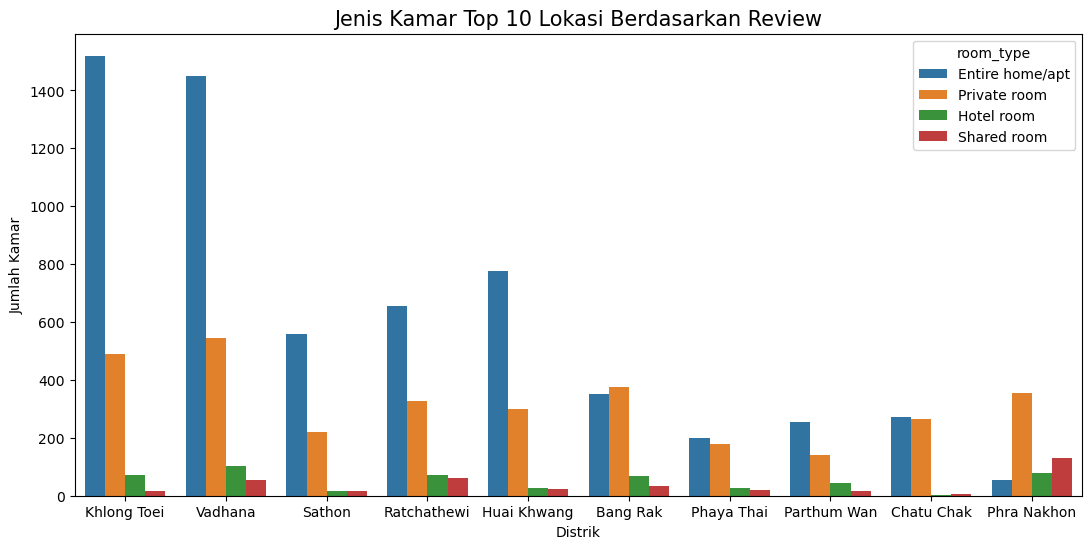

In [851]:
plt.figure(figsize=(13,6))
sns.barplot(data=top_10_room_type, x = 'neighbourhood', y = 'jumlah', hue = 'room_type')
plt.title('Jenis Kamar Top 10 Lokasi Berdasarkan Review', size = 15)
plt.xlabel('Distrik')
plt.ylabel('Jumlah Kamar')
plt.show()

- Dapat kita lihat jenis kamar `Entire home/apt` memiliki jumlah paling banyak diantara jenis kamar lainnya di hampir semua top 10 lokasi.
- Mengingat lokasi di pusat kota, wajar rasanya jenis kamar `Entire home/apt` cukup mendominasi

In [852]:
# Melakukan penggabungan berdasarkan kolom 'neighbourhood'
top_10_room_type_merged1 = pd.merge(top_10_sum1, df[['neighbourhood', 'room_type']], on='neighbourhood', how='left')

# Menampilkan hasil penggabungan
top_10_sum_merge1 = top_10_room_type_merged1.value_counts()
top_10_room_type_sorted1 = top_10_sum_merge1.sort_index(level=['number_of_reviews_ltm', 'neighbourhood'], ascending=[False, True])


In [853]:
top_10_room_type_sorted_reset1 = top_10_room_type_sorted1.reset_index(name='jumlah')  # Mengatur ulang indeks dan memberi nama kolom baru 'jumlah'
top_10_room_type1 = top_10_room_type_sorted_reset1  # Menyimpan hasil ke dalam variabel top_10_room

# Mengubah nama kolom '0' menjadi 'jumlah' menggunakan rename()
top_10_room_type1 = top_10_room_type1.rename(columns={'0': 'jumlah'})  # Atau dapat dilakukan di baris ini


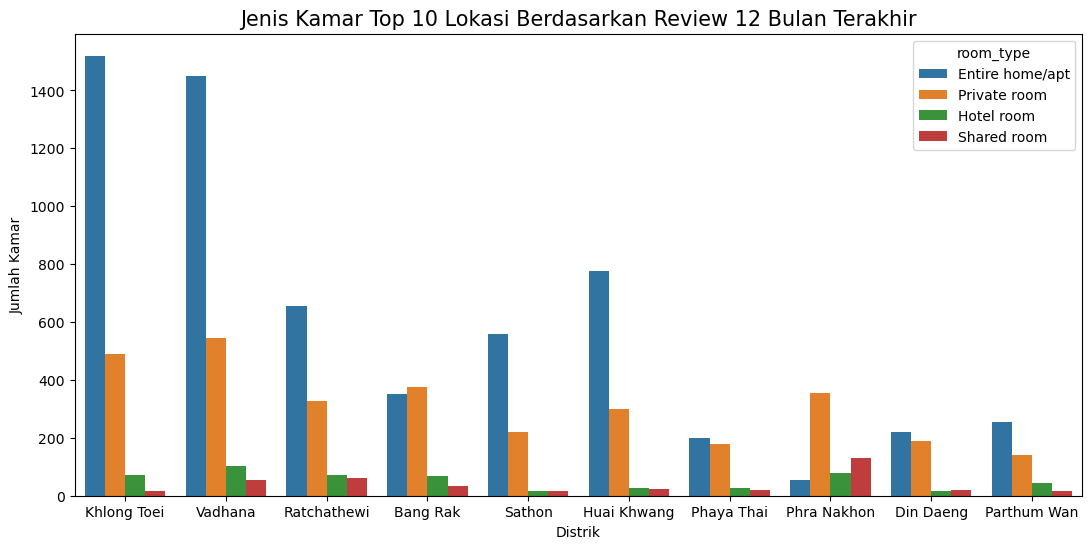

In [854]:
plt.figure(figsize=(13,6))
sns.barplot(data=top_10_room_type1, x = 'neighbourhood', y = 'jumlah', hue = 'room_type')
plt.title('Jenis Kamar Top 10 Lokasi Berdasarkan Review 12 Bulan Terakhir', size = 15)
plt.xlabel('Distrik')
plt.ylabel('Jumlah Kamar')
plt.show()

Dari barplot tersebut, kita bisa melihat lokasi Airbnb yang paling populer di Bangkok. Melalui riset di google, dapat diketahui hal-hal berikut:
1. Khlong Toei: Merupakan district yang terkenal dengan marketnya (Khlong Toei Market) yang murah dan menjual berbagai jenis bahan makanan dan makanan jadi.
2. Vadhana: Juga dapat disebut sebagai Watthana, merupakan district yang terkenal dengan pusat perbelanjaan dan kuliner yang modern.
3. Sathon: Merupakan district yang tergolong mewah dan memiliki banyak pilihan kuliner gourmet sampai high-end.
4. Ratchathewi: Merupakan district yang dekat dengan sarana transportasi (merupakan transport hub).
5. Huai Khwang: Merupakan district yang kaya akan wisata budaya (cultural landmark) seperti Siam Niramit Theatre.
6. Bang Rak: Merupakan district yang terkenal dengan pusat belanja dan hiburannya.
7. Phaya Thai: Merupakan district tempat pemukiman affluent yang memiliki banyak pilihan kafe outdoor dan coffee shop.
8. Parthum Wan: Lebih dikenal dengan Pathum Wan, merupakan district yang terkenal dengan pusat perbelanjaannya, yaitu mega-mall Siam.
9. Chatu Chak: Merupakan district yang terkenal dengan marketnya yang hanya buka di akhir pekan (Chatuchak Market) yang menjual berbagai macam barang mulai dari makanan, hiasan patung buddha, keramik, oleh-oleh, dsb.
10. Phra Nakhon: Merupakan district yang terkenal dengan bangunan bersejarahnya seperti Wat Pho, Grand Palace, dsb.
11. Din Daeng (12 bulan terkahir): Merupakan district yang terkenal dengan marketnya.

In [855]:
tipe =pd.DataFrame(data=df2.groupby('room_type').count()['id']).reset_index()
tipe

room_type    id
0  Entire home/apt  8912
1  Hotel room       648 
2  Private room     5770
3  Shared room      523

In [856]:
fig = px.pie(tipe,
             names = 'room_type', 
             values= 'id',
             title = 'Proporsi Tipe Penginapan Airbnb Bangkok',
             labels={'id':'Jumlah Hunian Airbnb',
                     'room_type': 'Tipe Airbnb'}
             )

fig.update_traces(pull=0.1)
fig.show()


- Dapat dilihat juga data review selama 12 bulan terakhir tetap konsisten didominasi oleh jenis kamar `Entire home/apt`.
- Dapat dilihat dari proporsi tipe penginapan airbnb bangkok didominasi jenis kamar `Entire home/apt` yang mencakup **56.2%**.
Dapat disimpulkan dari pendekatan lokasi bahwa jenis kamar `Entire home/apt` merupakan jenis kamar yang memiliki transaksi terbanyak dibandingkan jenis kamar lainnya.

# Pendekatan Host

Mari kita lanjutkan analisis kita melalui pendekatan host

In [857]:
# Menampilkan 10 host yang memiliki jumlah review terbanyak
df_host_sum = df.groupby('host_name')[['number_of_reviews']].sum().reset_index()
df_host_sum.sort_values(by = ['number_of_reviews'], ascending = False, inplace = True)
top_10_host = df_host_sum.head(10)
top_10_host.set_index('host_name', inplace = True)
top_10_host.reset_index(inplace = True)
top_10_host

host_name  number_of_reviews
0  Evan        6117             
1  Tony        5010             
2  Curry       4708             
3  Themustang  3584             
4  K           2962             
5  Patty       2929             
6  Max         2915             
7  Bee         2823             
8  Ed          2817             
9  Taosiam     2681

In [858]:
# Menampilkan 10 host yang memiliki jumlah review dalam 12 bulan terakhir terbanyak
df_host_sum1 = df.groupby('host_name')[['number_of_reviews_ltm']].sum().reset_index()
df_host_sum1.sort_values(by = ['number_of_reviews_ltm'], ascending = False, inplace = True)
top_10_host1 = df_host_sum1.head(10)
top_10_host1.set_index('host_name', inplace = True)
top_10_host1.reset_index(inplace = True)
top_10_host1

host_name  number_of_reviews_ltm
0  Curry     1766                 
1  Tony      1169                 
2  Mike      863                  
3  Max       844                  
4  Noons     818                  
5  Ed        802                  
6  N'Dee     750                  
7  Yefeng    702                  
8  Ludoping  653                  
9  Eva       603

In [859]:
# Disini kita akan membuat variabel kosong yang akan menampung list dari iterasi hitungan berapa kali nama host yang muncul berdasarkan top 10 host berdasarkan reviews.
host = []
list_count = []

for i in df_host_sum['host_name']:
  host.append(i)
  list_count.append(len(df[df["host_name"] == i]))

In [860]:
# Disini kita akan membuat variabel kosong yang akan menampung list dari iterasi hitungan berapa kali nama host yang muncul berdasarkan top 10 host berdasarkan review 12 Bulan Terakhir.
host1 = []
list_count1 = []

for i in df_host_sum1['host_name']:
  host1.append(i)
  list_count1.append(len(df[df["host_name"] == i]))

In [861]:
# Membuat variabel yang akan menampilkan jumlah listing yang dimiliki oleh Top 10 Host
df_list_count = pd.DataFrame(zip(host, list_count), columns = ['host_name', 'list_count'])
df_list_count

host_name  list_count
0     Evan        37        
1     Tony        50        
2     Curry       228       
3     Themustang  10        
4     K           91        
...  ..           ..        
5307  Santa       1         
5308  Morakot     1         
5309  Mopgi       1         
5310  Jakkrapant  1         
5311  Stéphanie   1         

[5312 rows x 2 columns]

In [862]:
# Menampilkan jumlah listing yang dimiliki oleh Top 10 Host dalam 12 bulan terakhir
df_list_count1 = pd.DataFrame(zip(host1, list_count1), columns = ['host_name', 'list_count'])
df_list_count1

host_name  list_count
0     Curry       228       
1     Tony        50        
2     Mike        55        
3     Max         49        
4     Noons       99        
...     ...       ..        
5307  Eniz        1         
5308  Emy         2         
5309  Emon        1         
5310  Paweesinee  1         
5311  Rattanon    1         

[5312 rows x 2 columns]

In [863]:
# Menggabungkan tabel top 10 host dan listing
result = pd.merge(df_host_sum, df_list_count, on='host_name', how='inner')
result.head(10)

host_name  number_of_reviews  list_count
0  Evan        6117               37        
1  Tony        5010               50        
2  Curry       4708               228       
3  Themustang  3584               10        
4  K           2962               91        
5  Patty       2929               54        
6  Max         2915               49        
7  Bee         2823               62        
8  Ed          2817               60        
9  Taosiam     2681               34

In [864]:
# Menggabungkan tabel top 10 host dalam 12 bulan terakhir dan listing
result1 = pd.merge(df_host_sum1, df_list_count1, on='host_name', how='inner')
result1.head(10)

host_name  number_of_reviews_ltm  list_count
0  Curry     1766                   228       
1  Tony      1169                   50        
2  Mike      863                    55        
3  Max       844                    49        
4  Noons     818                    99        
5  Ed        802                    60        
6  N'Dee     750                    23        
7  Yefeng    702                    24        
8  Ludoping  653                    56        
9  Eva       603                    50

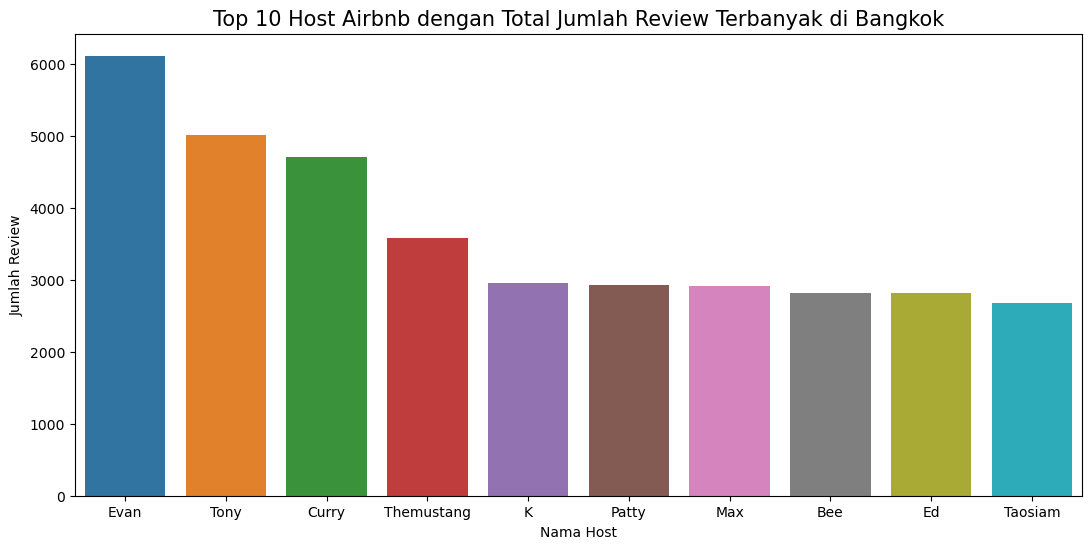

In [865]:
plt.figure(figsize=(13,6))
sns.barplot(data = top_10_host, x = 'host_name', y = 'number_of_reviews')
plt.title('Top 10 Host Airbnb dengan Total Jumlah Review Terbanyak di Bangkok', size=15)
plt.xlabel('Nama Host')
plt.ylabel('Jumlah Review')
plt.show()

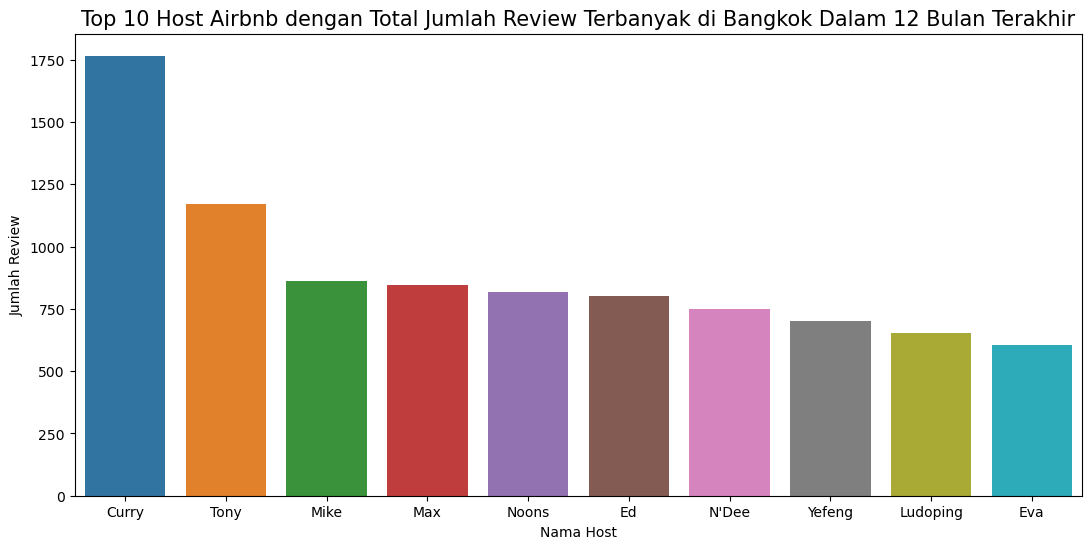

In [866]:
plt.figure(figsize=(13,6))
sns.barplot(data = top_10_host1, x = 'host_name', y = 'number_of_reviews_ltm')
plt.title('Top 10 Host Airbnb dengan Total Jumlah Review Terbanyak di Bangkok Dalam 12 Bulan Terakhir', size=15)
plt.xlabel('Nama Host')
plt.ylabel('Jumlah Review')
plt.show()

In [867]:
# Melakukan penggabungan berdasarkan kolom 'neighbourhood'
top_10_room_type_host = pd.merge(top_10_host, df[['host_name', 'room_type']], on='host_name', how='left')

# Menampilkan hasil penggabungan
top_10_sum_host = top_10_room_type_host.value_counts()
top_10_room_type_sorted_host = top_10_sum_host.sort_index(level=['number_of_reviews', 'host_name'], ascending=[False, True])


In [868]:
top_10_room_type_sorted_host_reset = top_10_room_type_sorted_host.reset_index(name='jumlah')  # Mengatur ulang indeks dan memberi nama kolom baru 'jumlah'
top_10_room_type_host = top_10_room_type_sorted_host_reset  # Menyimpan hasil ke dalam variabel top_10_room

# Mengubah nama kolom '0' menjadi 'jumlah' menggunakan rename()
top_10_room_type_host = top_10_room_type_host.rename(columns={'0': 'jumlah'})  # Atau dapat dilakukan di baris ini
top_10_room_type_host



host_name  number_of_reviews        room_type  jumlah
0   Evan        6117               Entire home/apt  37    
1   Tony        5010               Entire home/apt  50    
2   Curry       4708               Entire home/apt  228   
3   Themustang  3584               Hotel room       10    
4   K           2962               Entire home/apt  74    
5   K           2962               Hotel room       15    
6   K           2962               Private room     2     
7   Patty       2929               Entire home/apt  40    
8   Patty       2929               Private room     13    
9   Patty       2929               Hotel room       1     
10  Max         2915               Entire home/apt  46    
11  Max         2915               Private room     3     
12  Bee         2823               Entire home/apt  54    
13  Bee         2823               Private room     5     
14  Bee         2823               Hotel room       3     
15  Ed          2817               Entire home/apt  56    
16  Ed          2817               Private room     4     
17  Taosiam     2681               Private room     28    
18  Taosiam     2681               Entire home/apt  6

In [869]:
# Melakukan penggabungan berdasarkan kolom 'neighbourhood'
top_10_room_type_host1 = pd.merge(top_10_host1, df[['host_name', 'room_type']], on='host_name', how='left')

# Menampilkan hasil penggabungan
top_10_sum_host1 = top_10_room_type_host1.value_counts()
top_10_room_type_sorted_host1 = top_10_sum_host1.sort_index(level=['number_of_reviews_ltm', 'host_name'], ascending=[False, True])

In [870]:
top_10_room_type_sorted_host_reset1 = top_10_room_type_sorted_host1.reset_index(name='jumlah')  # Mengatur ulang indeks dan memberi nama kolom baru 'jumlah'
top_10_room_type_host1 = top_10_room_type_sorted_host_reset1  # Menyimpan hasil ke dalam variabel top_10_room

# Mengubah nama kolom '0' menjadi 'jumlah' menggunakan rename()
top_10_room_type_host1 = top_10_room_type_host1.rename(columns={'0': 'jumlah'})  # Atau dapat dilakukan di baris ini
top_10_room_type_host1


host_name  number_of_reviews_ltm        room_type  jumlah
0   Curry     1766                   Entire home/apt  228   
1   Tony      1169                   Entire home/apt  50    
2   Mike      863                    Entire home/apt  53    
3   Mike      863                    Private room     2     
4   Max       844                    Entire home/apt  46    
5   Max       844                    Private room     3     
6   Noons     818                    Entire home/apt  99    
7   Ed        802                    Entire home/apt  56    
8   Ed        802                    Private room     4     
9   N'Dee     750                    Entire home/apt  23    
10  Yefeng    702                    Entire home/apt  24    
11  Ludoping  653                    Entire home/apt  54    
12  Ludoping  653                    Hotel room       1     
13  Ludoping  653                    Private room     1     
14  Eva       603                    Entire home/apt  48    
15  Eva       603                    Private room     2

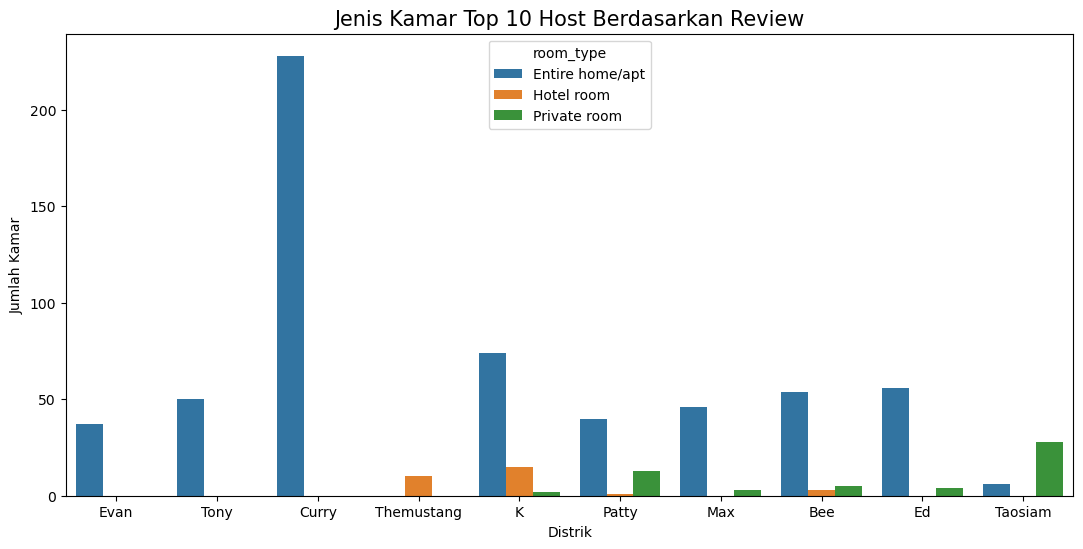

In [871]:
plt.figure(figsize=(13,6))
sns.barplot(data=top_10_room_type_host, x = 'host_name', y = 'jumlah', hue = 'room_type')
plt.title('Jenis Kamar Top 10 Host Berdasarkan Review', size = 15)
plt.xlabel('Distrik')
plt.ylabel('Jumlah Kamar')
plt.show()

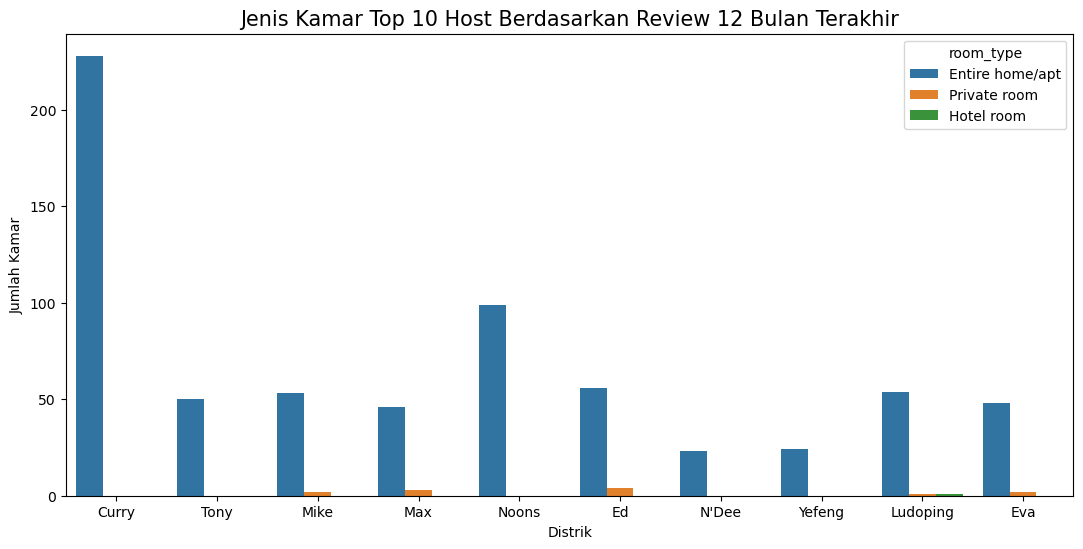

In [872]:
plt.figure(figsize=(13,6))
sns.barplot(data=top_10_room_type_host1, x = 'host_name', y = 'jumlah', hue = 'room_type')
plt.title('Jenis Kamar Top 10 Host Berdasarkan Review 12 Bulan Terakhir', size = 15)
plt.xlabel('Distrik')
plt.ylabel('Jumlah Kamar')
plt.show()

Dapat dilihat dari top 10 host berdasarkan review jenis kamar Entire home/apt yang paling banyak direview daripada jenis kamar lainnya

# Pendekatan Harga

Berikutnya mari kita lanjut ke pendekatan harga

In [873]:
# Cek distribusi price
from scipy.stats import normaltest
stats, pval=normaltest(df['price'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


In [874]:
cek_p = df
cek_p

name                  id  \
0      Nice room with superb city view                     27934                
1      Easy going landlord,easy place                      27979                
2      modern-style apartment in Bangkok                   28745                
3      Spacious one bedroom at The Kris Condo Bldg. 3      35780                
4      Suite Room 3 at MetroPoint                          941865               
...                           ...                             ...               
15848  素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街       790465040741092826   
15849  Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea  790474503157243541   
15850  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   790475335086864240   
15851  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   790475546213717328   
15852  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   790476492384199044   

         host_id   host_name neighbourhood   latitude   longitude  \
0      120437     Nuttee      Ratchathewi   13.759830  100.541340   
1      120541     Emy         Bang Na       13.668180  100.616740   
2      123784     Familyroom  Bang Kapi     13.752320  100.624020   
3      153730     Sirilak     Din Daeng     13.788230  100.572560   
4      610315     Kasem       Bang Kapi     13.768720  100.633380   
...       ...       ...             ...           ...         ...   
15848  94899359   Renee       Pra Wet       13.715132  100.653458   
15849  491526222  Phakhamon   Ratchathewi   13.753052  100.538738   
15850  491526222  Phakhamon   Ratchathewi   13.753169  100.538700   
15851  491526222  Phakhamon   Ratchathewi   13.754789  100.538757   
15852  491526222  Phakhamon   Ratchathewi   13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt  1905   3               65                 2020-01-06   
1      Private room     1316   1               0                  -            
2      Private room     800    60              0                  -            
3      Private room     1286   7               2                  2022-04-01   
4      Private room     1905   1               0                  -            
...             ...      ...  ..              ..                 ..            
15848  Private room     2298   28              0                  -            
15849  Private room     1429   1               0                  -            
15850  Private room     1214   1               0                  -            
15851  Private room     1214   1               0                  -            
15852  Private room     1214   1               0                  -            

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0      2                               353               0                      
1      2                               358               0                      
2      1                               365               0                      
3      1                               323               1                      
4      3                               365               0                      
...   ..                               ...              ..                      
15848  1                               362               0                      
15849  14                              365               0                      
15850  14                              365               0                      
15851  14                              365               0                      
15852  14                              365               0                      

[15853 rows x 15 columns]

Karena pada uji hipotesis data tidak terdistribusi normal maka kita menggunakan metode 'spearman' untuk melihat hubungan masing-masing variabel numerik lainnya terhadap variabel price

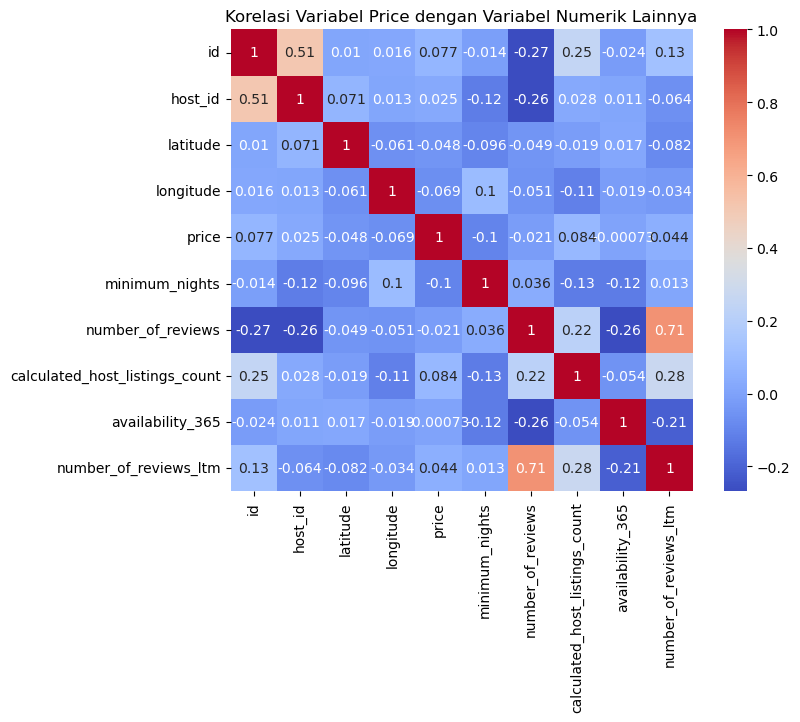

In [875]:

plt.figure(figsize=(8, 6))
sns.heatmap(cek_p.corr(method='spearman'), annot=True, cmap='coolwarm', square=True)
plt.title('Korelasi Variabel Price dengan Variabel Numerik Lainnya')
plt.show()

Beberapa hal yang dapat di highlight antara lain:
* Dapat dilihat bahwa korelasi variabel `price` dengan variabel `minimum_nights` tidak memilki korelasi yang postif dan cenderung negatif walaupun tidak signifikan
* Dapat dilihat bahwa korelasi variabel `price` dengan variabel `number_of_reviews` tidak memilki korelasi yang kuat dan cenderung negatif
walaupun tidak signifikan
* Dapat dilihat bahwa korelasi variabel `price` dengan variabel `availability_365` tidak memilki korelasi yang kuat dan cenderung negatif
walaupun tidak signifikan
* Dapat dilihat bahwa korelasi variabel `price` dengan variabel `number_of_reviews_ltm` tidak memilki korelasi yang kuat dan cenderung positif walaupun tidak signifikan

In [876]:
lokasi = []

for i in top_10_sum['neighbourhood']:
  lokasi.append(i)

In [877]:
# Berikutnya kita ingin melihat median harga dari top 10 lokasi
df_lokasi_price = df.groupby(['neighbourhood', 'room_type'])[['price']].median().reset_index()
df_lokasi_price.sort_values(by = ['price'], ascending = False, inplace = True)
df_lokasi_price.set_index('neighbourhood', inplace = True)
top_10_lokprice = df_lokasi_price.loc[lokasi].reset_index()
top_10_lokprice.head(5)

neighbourhood        room_type   price
0  Khlong Toei   Hotel room       1816.0
1  Khlong Toei   Entire home/apt  1732.0
2  Khlong Toei   Private room     1497.0
3  Khlong Toei   Shared room      560.0 
4  Vadhana       Hotel room       2440.5

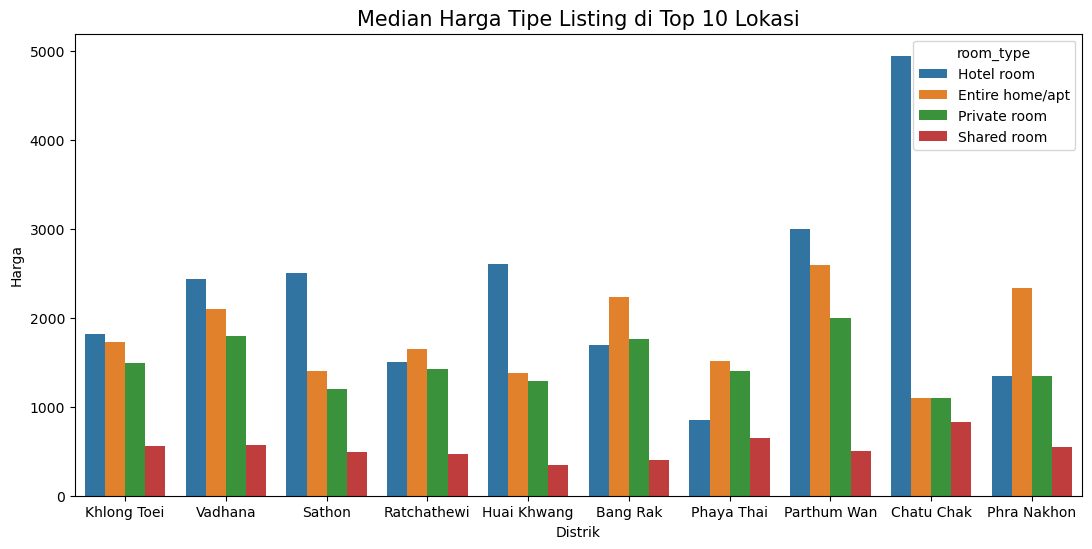

In [878]:
plt.figure(figsize=(13,6))
sns.barplot(data=top_10_lokprice, x = 'neighbourhood', y = 'price', hue = 'room_type')
plt.title('Median Harga Tipe Listing di Top 10 Lokasi', size = 15)
plt.xlabel('Distrik')
plt.ylabel('Harga')
plt.show()

* Dapat disimpulkan dari pendekatan bahwa secara umum variabel harga tidak terlalu berkorelasi dengan variabel numerik lainnya.
* Median harga sewa untuk tiap jenis kamar cenderung sama di top 10 lokasi kecuali pada jenis kamar `Entire home/apt` di distrik `Chatu Cak`.

In [879]:
hp = []
for i in top_10_host['host_name']:
  hp.append(i)

hp1 = []
for i in top_10_host1['host_name']:
  hp1.append(i)

In [880]:
# Menampilkan harga top 10 host
df_host_price = df.groupby(['host_name', 'room_type'])[['price']].median().reset_index()
df_host_price.sort_values(by = ['price'], ascending = False, inplace = True)
df_host_price.set_index('host_name', inplace = True)
top_10_hostprice = df_host_price.loc[hp].reset_index()
top_10_hostprice

host_name        room_type   price
0   Evan        Entire home/apt  800.0 
1   Tony        Entire home/apt  1329.5
2   Curry       Entire home/apt  1468.5
3   Themustang  Hotel room       2329.0
4   K           Entire home/apt  1874.0
5   K           Hotel room       1089.0
6   K           Private room     1074.5
7   Patty       Entire home/apt  1414.5
8   Patty       Hotel room       1371.0
9   Patty       Private room     1157.0
10  Max         Entire home/apt  1777.0
11  Max         Private room     1200.0
12  Bee         Hotel room       2995.0
13  Bee         Entire home/apt  1730.0
14  Bee         Private room     1469.0
15  Ed          Private room     4464.5
16  Ed          Entire home/apt  2150.0
17  Taosiam     Entire home/apt  710.0 
18  Taosiam     Private room     680.0

In [912]:
# Menampilkan harga top 10 host 12 bulan terakhir
df_host_price1 = df.groupby(['host_name', 'room_type'])[['price']].median().reset_index()
df_host_price1.sort_values(by = ['price'], ascending = False, inplace = True)
df_host_price1.set_index('host_name', inplace = True)
top_10_hostprice1 = df_host_price.loc[hp1].reset_index()
top_10_hostprice1.head()

host_name        room_type   price
0  Curry     Entire home/apt  1468.5
1  Tony      Entire home/apt  1329.5
2  Mike      Entire home/apt  3378.0
3  Mike      Private room     482.5 
4  Max       Entire home/apt  1777.0

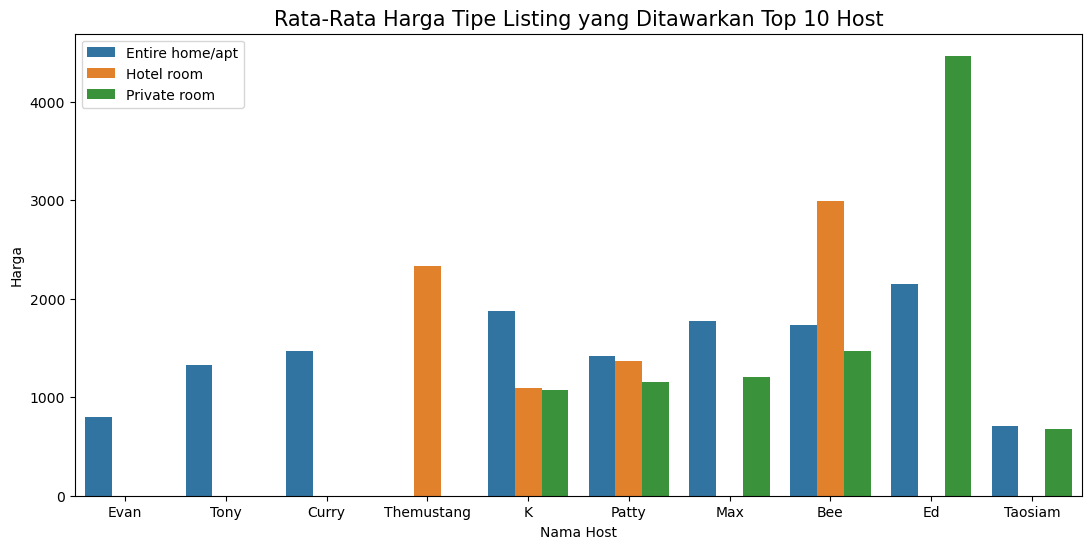

In [913]:
plt.figure(figsize=(13,6))
sns.barplot(data=top_10_hostprice, x = 'host_name', y = 'price', hue = 'room_type')
plt.title('Rata-Rata Harga Tipe Listing yang Ditawarkan Top 10 Host', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Harga')
plt.legend(loc = 2)
plt.show()

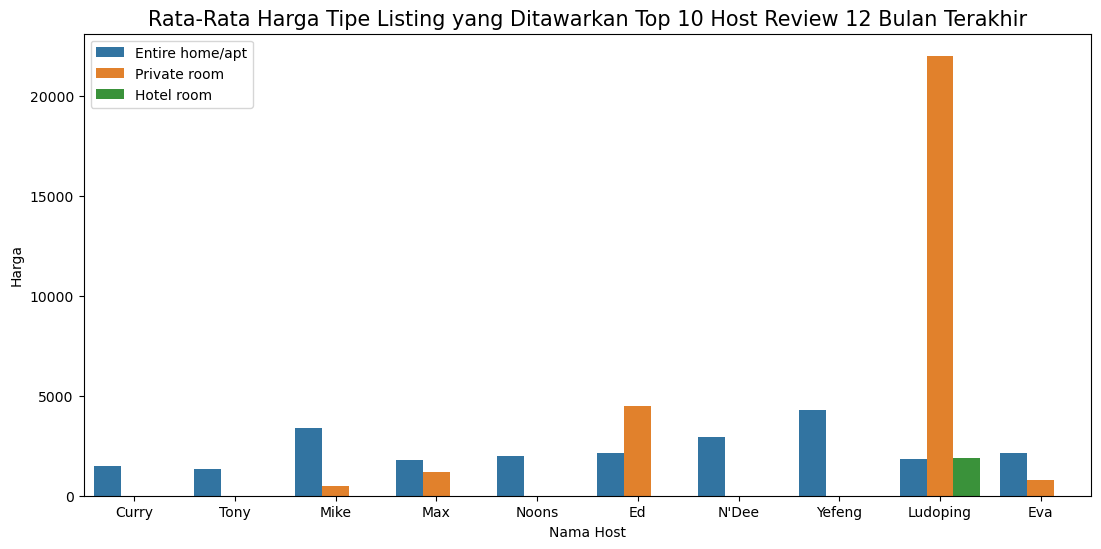

In [911]:
plt.figure(figsize=(13,6))
sns.barplot(data=top_10_hostprice1, x = 'host_name', y = 'price', hue = 'room_type')
plt.title('Rata-Rata Harga Tipe Listing yang Ditawarkan Top 10 Host Review 12 Bulan Terakhir', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Harga')
plt.legend(loc = 2)
plt.show()

Berdasarkan pendekatan harga :
- Distrik **Chatu Chak** memiliki median harga paling tinggi yaitu jenis kamar `Entire home/apt` berdasarkan Top 10 Lokasi
- Berdasarkan Top 10 host dengan total review `Ed` memiliki median tertinggi yaitu jenis kamar `Private Room`
- Berdasarkan Top 10 host dengan review 12 bulan terakhir `Ludoping` memiliki median tertinggi yaitu jenis kamar `Private Room`

# Pendekatan Ketersediaan

Berikutnya mari kita coba lanjut ke pendekatan ketersediaan

Pertama mari kita lihat rata-rata ketersediaan berdasarkan `jenis kamar`

In [884]:
# Menggabungkan dan mengurutkan data berdasarkan ketersediaan terendah
test = df2.groupby('room_type')

test_df = pd.DataFrame(test.mean()['availability_365']).reset_index()
test_df['availability_365'] = round(test_df['availability_365'],0)
test_df.sort_values('availability_365', ascending=True)

room_type  availability_365
0  Entire home/apt  225.0           
1  Hotel room       264.0           
2  Private room     269.0           
3  Shared room      270.0

In [885]:
fig = px.bar(test_df, 
            x=['Entire home/apt','Hotel room','Private room','Shared room'], 
            y='availability_365', 
            color= 'availability_365',
            text= 'availability_365',
            title='Rata-rata Ketersediaan Tiap Jenis Kamar(Hari)',
            labels={'x': 'Jenis Kamar Airbnb', 'availability_365': 'Rata-Rata Ketersediaan'})
        
fig.update_layout(xaxis = {'categoryorder':'total ascending'})
fig.update_traces(width=0.5)

fig.show()

Dari data diatas jenis kamar `Entire home/apt` memiliki rata-rata ketersedian paling rendah diantara tipe lainnya.

Selanjutnya mari kita lihat dekat rata-rata ketersedian tiap lokasi di top 10 lokasi

In [886]:
# Menampilkan rata-rata ketersediaan di top 10 lokasi
df_lokasi_av = df.groupby(['neighbourhood', 'room_type'])[['availability_365']].mean().reset_index()
df_lokasi_av.sort_values(by = ['availability_365'], ascending = True, inplace = True)
df_lokasi_av.set_index('neighbourhood', inplace = True)
top_10_lokav = df_lokasi_av.loc[lokasi].reset_index()
top_10_lokav.head(5)

neighbourhood        room_type  availability_365
0  Khlong Toei   Shared room      189.533333      
1  Khlong Toei   Hotel room       199.931507      
2  Khlong Toei   Entire home/apt  217.740132      
3  Khlong Toei   Private room     282.155419      
4  Vadhana       Entire home/apt  205.161268

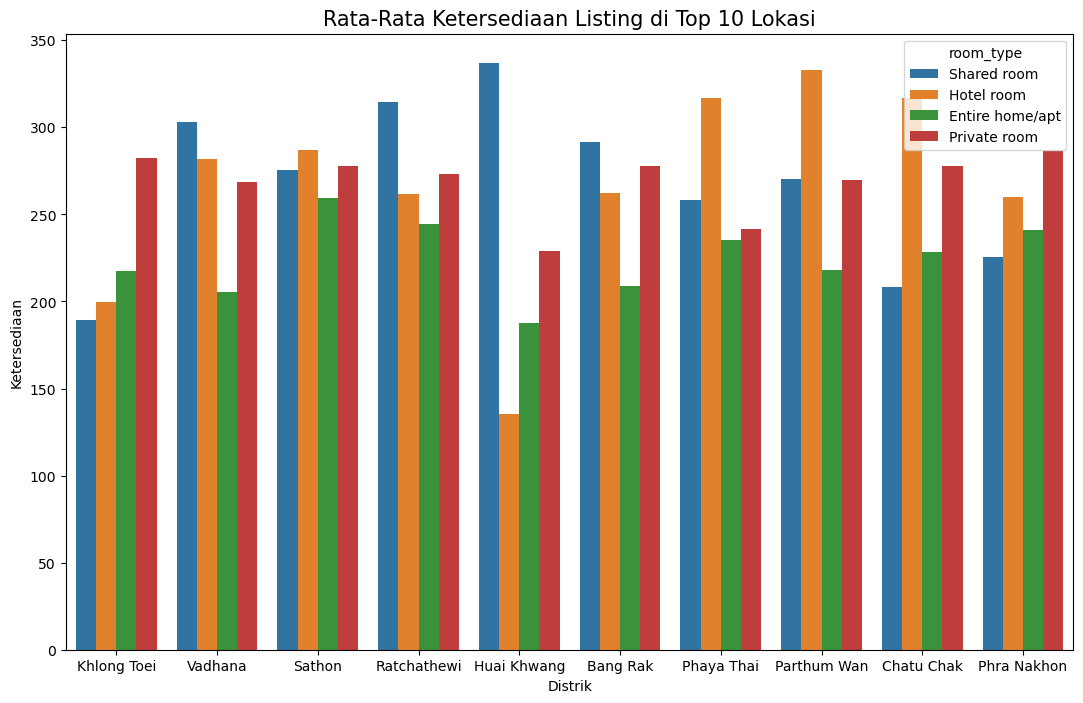

In [887]:
plt.figure(figsize=(13,8))
sns.barplot(data=top_10_lokav, x = 'neighbourhood', y = 'availability_365', hue = 'room_type')
plt.title('Rata-Rata Ketersediaan Listing di Top 10 Lokasi', size = 15)
plt.xlabel('Distrik')
plt.ylabel('Ketersediaan(Hari)')
plt.show()

Selanjutnya mari kita lihat ketersediaan top 10 host berdasarkan total review dan review 12 bulan terakhir berdasarkan jenis kamar.

Disini kita akan membuat variabel list kosong yang akan menampung nama host.

In [888]:
hn = []
for i in top_10_host['host_name']:
  hn.append(i)

In [889]:
hn1 = []
for i in top_10_host1['host_name']:
    hn1.append(i)

In [890]:
# Menampilkan rata-rata ketersediaan di top 10 lokasi
df_host_name_av = df.groupby(['host_name', 'room_type'])[['availability_365']].mean().reset_index()
df_host_name_av.sort_values(by = ['availability_365'], ascending = True, inplace = True)
df_host_name_av.set_index('host_name', inplace = True)
top_10_host_name = df_host_name_av.loc[hn].reset_index()
top_10_host_name.head(5)

host_name        room_type  availability_365
0  Evan        Entire home/apt  338.216216      
1  Tony        Entire home/apt  163.600000      
2  Curry       Entire home/apt  259.478070      
3  Themustang  Hotel room       38.200000       
4  K           Entire home/apt  290.175676

In [891]:
# Menampilkan rata-rata ketersediaan di top 10 lokasi
df_host_name_av1 = df.groupby(['host_name', 'room_type'])[['availability_365']].mean().reset_index()
df_host_name_av1.sort_values(by = ['availability_365'], ascending = True, inplace = True)
df_host_name_av1.set_index('host_name', inplace = True)
top_10_host_name1 = df_host_name_av1.loc[hn1].reset_index()
top_10_host_name1.head(5)

host_name        room_type  availability_365
0  Curry     Entire home/apt  259.478070      
1  Tony      Entire home/apt  163.600000      
2  Mike      Entire home/apt  79.150943       
3  Mike      Private room     180.500000      
4  Max       Entire home/apt  127.913043

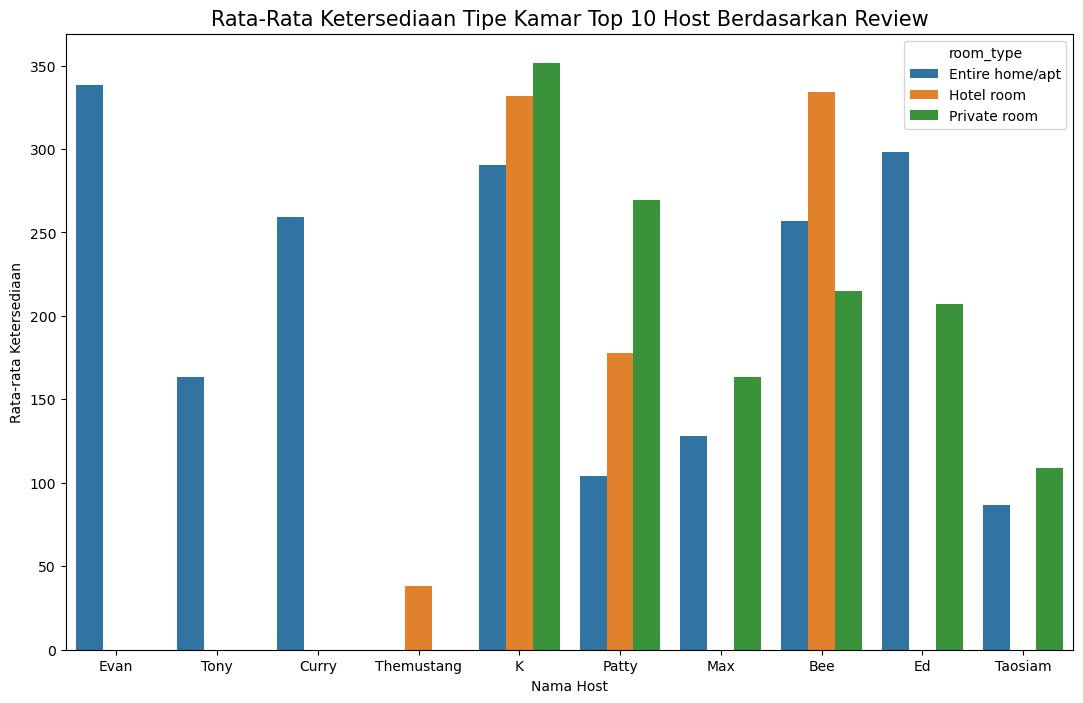

In [892]:
plt.figure(figsize=(13,8))
sns.barplot(data=top_10_host_name, x = 'host_name', y = 'availability_365', hue = 'room_type')
plt.title('Rata-Rata Ketersediaan Tipe Kamar Top 10 Host Berdasarkan Review', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Rata-rata Ketersediaan')
plt.show()

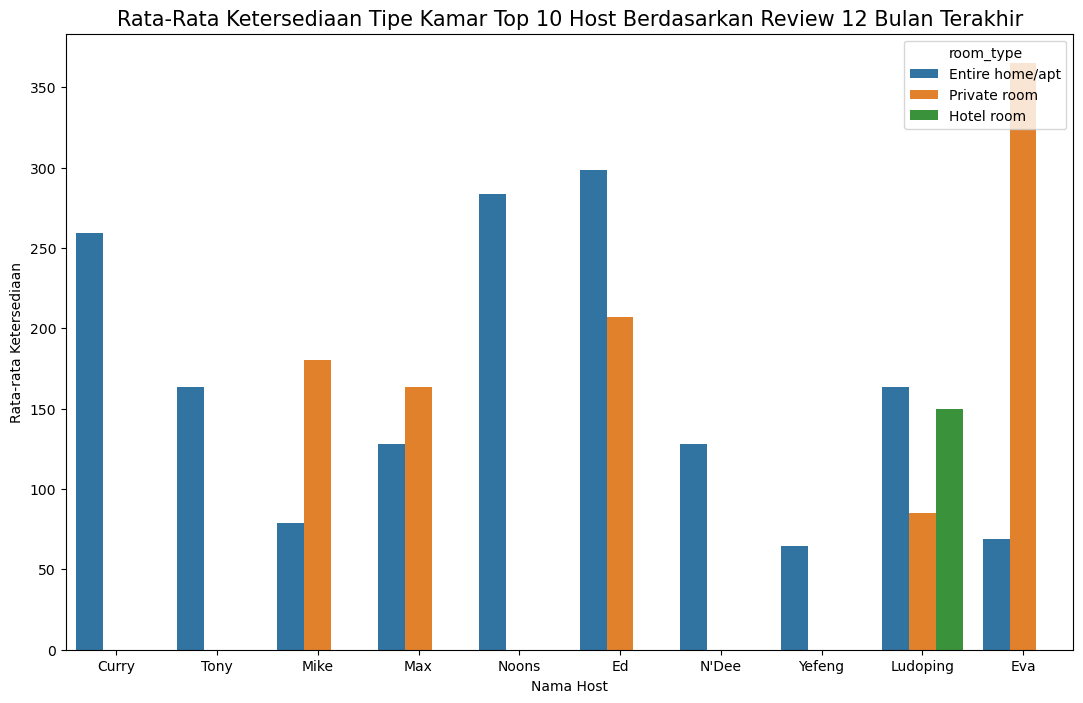

In [893]:
plt.figure(figsize=(13,8))
sns.barplot(data=top_10_host_name1, x = 'host_name', y = 'availability_365', hue = 'room_type')
plt.title('Rata-Rata Ketersediaan Tipe Kamar Top 10 Host Berdasarkan Review 12 Bulan Terakhir', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Rata-rata Ketersediaan')
plt.show()

* Dapat disimpulkan melalui pendekatan host, jenis kamar yang paling mendominasi diantara top 10 host adalah jenis kamar `Entire home/apt` dari total review dan review 12 bulan terakhir.



Selanjutnya mari kita lihat hubungan variabel ketersediaan dengan banyak review

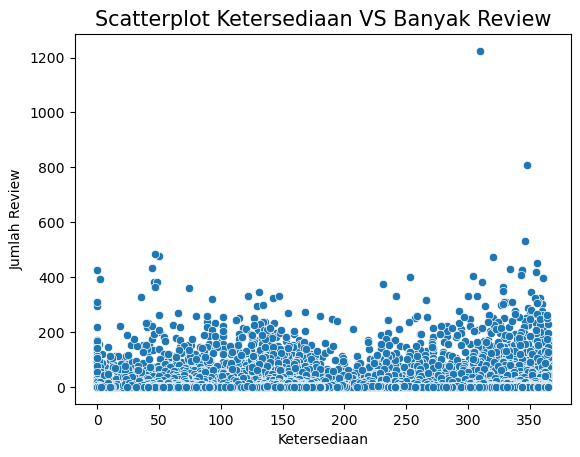

In [894]:
# Scatterplot hubungan ketersediaan dan jumlah review
sns.scatterplot(x = df['availability_365'], y = df['number_of_reviews'])
plt.title('Scatterplot Ketersediaan VS Banyak Review', size=15)
plt.xlabel('Ketersediaan')
plt.ylabel('Jumlah Review')
plt.show()

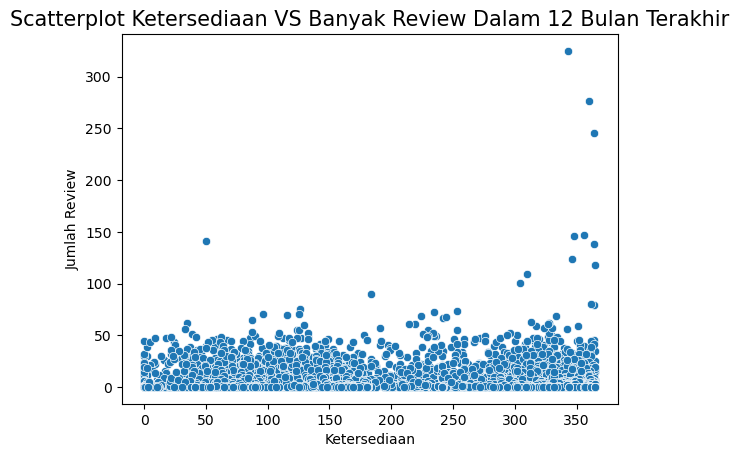

In [895]:
# Scatterplot hubungan ketersediaan dan jumlah review dalam 12 bulan terakhir
sns.scatterplot(x = df['availability_365'], y = df['number_of_reviews_ltm'])
plt.title('Scatterplot Ketersediaan VS Banyak Review Dalam 12 Bulan Terakhir', size=15)
plt.xlabel('Ketersediaan')
plt.ylabel('Jumlah Review')
plt.show()

Dapat disimpulkan berdasarkan pendekatan ketersediaan jenis kamar `entire home/apt` memiliki ketersediaan hari yang yang paling rendah menandakan bahwa jenis kamar ini paling banyak diminati dan didukung juga oleh data dari top 10 lokasi berdasarkan yang paling banyak di review

Jika dilihat dari diagram scatterplot secara umum hubungan jumlah review dengan ketersediaan tidak berkorelasi positif atau tidak berpengaruh signifikan.

Dari scatterplot dan uji korelasi yang dilakukan, dapat diketahui bahwa ketersediaan memiliki korelasi lemah negatif terhadap popularitas. Semakin lama ketersediaan suatu listing x hari, semakin sedikit jumlah review yang didapatkan.

Hal tersebut diduga terjadi karena guest cenderung memilih listing yang sudah terkenal atau berada di daerah yang populer. Listing yang populer atau berada di daerah yang populer cenderung akan ramai dengan guest, sehingga mengakibatkan ketersediaan listing semakin sedikit (karena penuh dibooking guest). Sehingga, terbentuklah korelasi negatif antara ketersediaan dengan jumlah review.

# Pendekatan Minimum Nights

Terakhir mari kita lanjut melalui pendekatan minimum nights.

In [896]:
# Cek distribusi minimum nights
from scipy.stats import normaltest
stats, pval=normaltest(df['minimum_nights'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


In [897]:
# Karena tidak berdistribusi normal, korelasi menggunakan spearman
df[['minimum_nights', 'number_of_reviews']].corr(method='spearman')

minimum_nights  number_of_reviews
minimum_nights     1.000000        0.036257         
number_of_reviews  0.036257        1.000000

In [898]:
# Karena tidak berdistribusi normal, korelasi menggunakan spearman
df[['minimum_nights', 'number_of_reviews_ltm']].corr(method='spearman')

minimum_nights  number_of_reviews_ltm
minimum_nights         1.000000        0.012681             
number_of_reviews_ltm  0.012681        1.000000

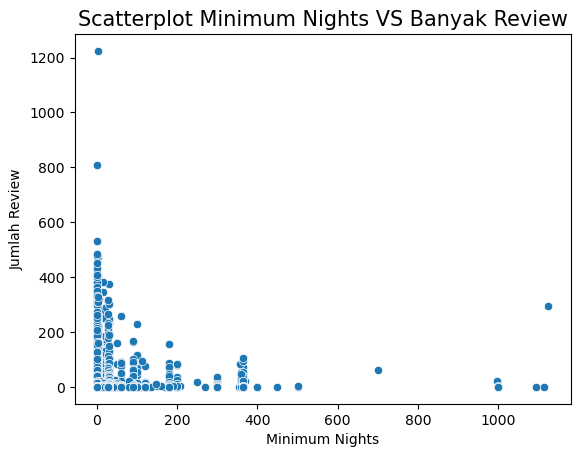

In [899]:
# Scatterplot hubungan minimum nights dan jumlah review
sns.scatterplot(x = df['minimum_nights'], y = df['number_of_reviews'])
plt.title('Scatterplot Minimum Nights VS Banyak Review', size=15)
plt.xlabel('Minimum Nights')
plt.ylabel('Jumlah Review')
plt.show()

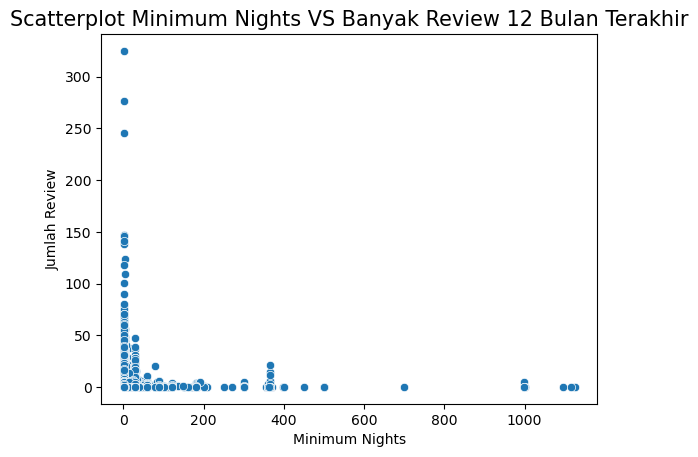

In [900]:
# Scatterplot hubungan minimum nights dan jumlah review da;am 12 bulan terakhir
sns.scatterplot(x = df['minimum_nights'], y = df['number_of_reviews_ltm'])
plt.title('Scatterplot Minimum Nights VS Banyak Review 12 Bulan Terakhir', size=15)
plt.xlabel('Minimum Nights')
plt.ylabel('Jumlah Review')
plt.show()

Dapat dilihat bahwa tipe listing entire home memiliki rata-rata lama sewa minimum tertinggi dibanding tipe listing yang lain. Hal tersebut tentunya masuk akal, karena penyewaan satu rumah penuh jarang (hampir tidak pernah) hanya digunakan untuk 1 hari saja. Mengingat tipe listing entire home/apt adalah yang paling populer, lama minimum sewa yang rendah kurang menentukan popularitas listing.

In [901]:
# Menampilkan rata-rata lama sewa minimum di top 10 lokasi
df_lokasi_mn = df.groupby(['neighbourhood', 'room_type'])[['minimum_nights']].mean().reset_index()
df_lokasi_mn.sort_values(by = ['minimum_nights'], ascending = True, inplace = True)
df_lokasi_mn.set_index('neighbourhood', inplace = True)
top_10_lokmn = df_lokasi_mn.loc[lokasi].reset_index()
top_10_lokmn.head()

neighbourhood        room_type  minimum_nights
0  Khlong Toei   Hotel room       1.383562      
1  Khlong Toei   Shared room      1.400000      
2  Khlong Toei   Private room     9.466258      
3  Khlong Toei   Entire home/apt  16.326316     
4  Vadhana       Shared room      1.207547

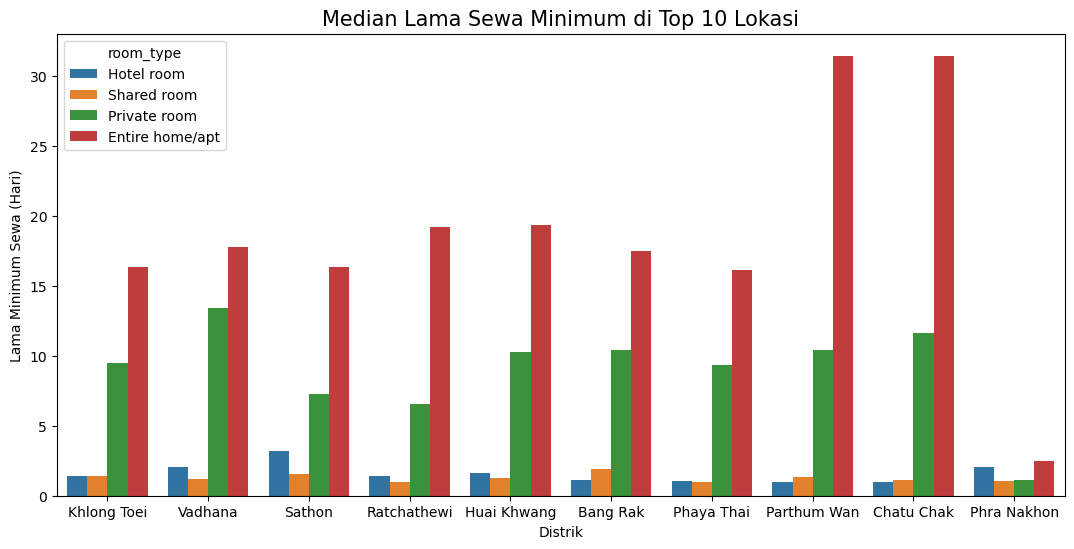

In [902]:
plt.figure(figsize=(13,6))
sns.barplot(data=top_10_lokmn, x = 'neighbourhood', y = 'minimum_nights', hue = 'room_type')
plt.title('Median Lama Sewa Minimum di Top 10 Lokasi', size = 15)
plt.xlabel('Distrik')
plt.ylabel('Lama Minimum Sewa (Hari)')
plt.show()


* Dapat dilihat jenis kamar Entire home/apt memiliki lama sewa minimum tertinggi dari keseluruhan jenis kamar di top 10 lokasi.
* Dapat disimpulkan bahwa pendekatan minimum nights atau lama sewa minimum kurang berpengaruh signifikan terhadap review secara keseluruhan. Menandakan bahwa minimum nights bukanlah variabel potensial untuk strategi meningkatkan transaksi/revenue.

In [903]:
# Menampilkan minimum nights top 10 host
df_host_mn = df.groupby(['host_name', 'room_type'])[['minimum_nights']].mean().reset_index()
df_host_mn.sort_values(by = ['minimum_nights'], ascending = True, inplace = True)
df_host_mn.set_index('host_name', inplace = True)
top_10_hostmn = df_host_mn.loc[hp].reset_index()
top_10_hostmn.head(5)

host_name        room_type  minimum_nights
0  Evan        Entire home/apt  1.108108      
1  Tony        Entire home/apt  1.820000      
2  Curry       Entire home/apt  2.460526      
3  Themustang  Hotel room       1.000000      
4  K           Hotel room       1.000000

In [904]:
# Menampilkan minimum nights top 10 host 12 bulan terakhir
df_host_mn1 = df.groupby(['host_name', 'room_type'])[['minimum_nights']].mean().reset_index()
df_host_mn1.sort_values(by = ['minimum_nights'], ascending = False, inplace = True)
df_host_mn1.set_index('host_name', inplace = True)
top_10_hostmn1 = df_host_mn1.loc[hp1].reset_index()
top_10_hostmn1.head()

host_name        room_type  minimum_nights
0  Curry     Entire home/apt  2.460526      
1  Tony      Entire home/apt  1.820000      
2  Mike      Private room     90.500000     
3  Mike      Entire home/apt  2.528302      
4  Max       Private room     20.666667

In [905]:
# Rata-rata minimum nights Entire home/apt di semua Top 10 lokasi
rata2 = top_10_lokmn[top_10_lokmn['room_type'] == 'Entire home/apt']['minimum_nights'].mean()
rata2

18.80389451771773

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


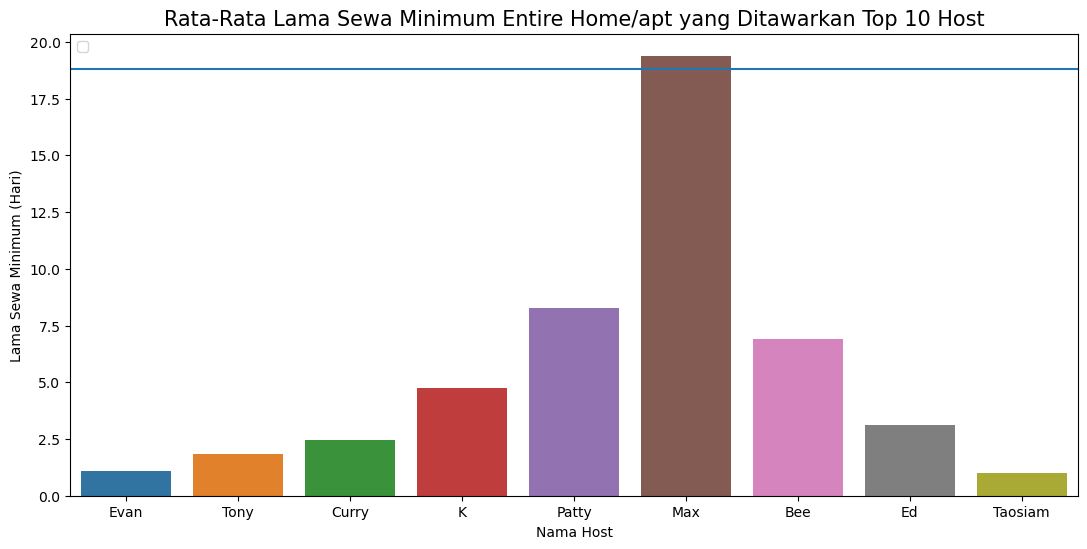

In [906]:
plt.figure(figsize=(13,6))
graph = sns.barplot(data=top_10_hostmn[top_10_hostmn['room_type'] == 'Entire home/apt'], x = 'host_name', y = 'minimum_nights')
graph.axhline(rata2)
plt.title('Rata-Rata Lama Sewa Minimum Entire Home/apt yang Ditawarkan Top 10 Host', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Lama Sewa Minimum (Hari)')
plt.legend(loc = 2)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


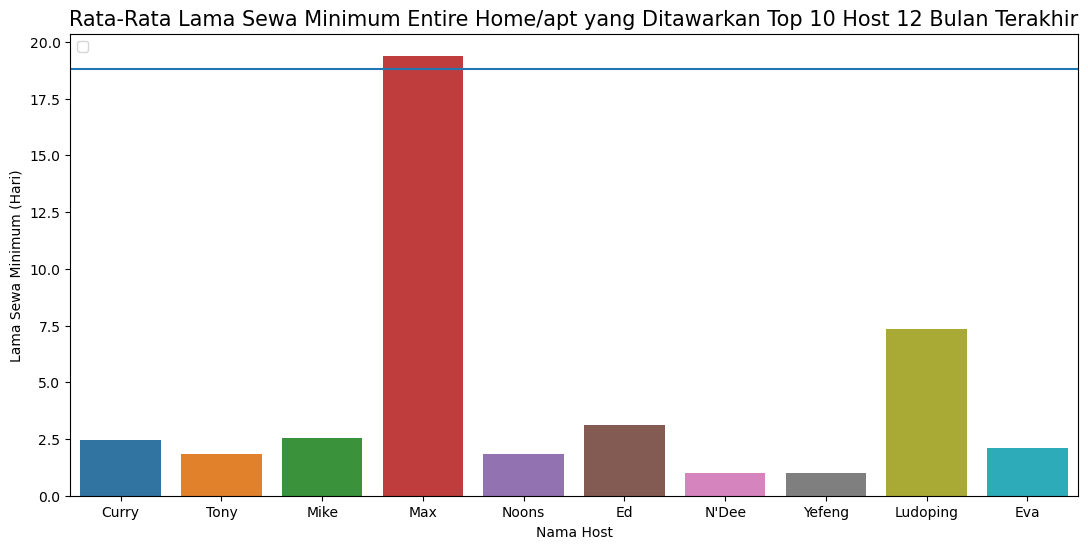

In [907]:
plt.figure(figsize=(13,6))
graph = sns.barplot(data=top_10_hostmn1[top_10_hostmn1['room_type'] == 'Entire home/apt'], x = 'host_name', y = 'minimum_nights')
graph.axhline(rata2)
plt.title('Rata-Rata Lama Sewa Minimum Entire Home/apt yang Ditawarkan Top 10 Host 12 Bulan Terakhir', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Lama Sewa Minimum (Hari)')
plt.legend(loc = 2)
plt.show()

Walaupun lama sewa minimum tergolong kurang signifikan melalui uji korelasi, dari visualisasi barplot kita bisa melihat bahwa rata-rata lama sewa minimum tipe listing entire home/apt yang ditawarkan oleh top 10 host (baik secara keseluruhan maupun dalam 12 bulan terakhir) sebagian besar berada di bawah rata-rata lama sewa minimum listing entire home/apt di top 10 lokasi.

Dapat disimpulkan bahwa walaupun kurang signifikan, lama sewa minimum tetap menjadi pertimbangan guest dalam memilih listing.

# Kesimpulan dan Rekomendasi

Kesimpulan :

Dari analisis yang telah dilakukan dari berbagai pendekatan yang fokus kepada `jenis kamar` berdasarkan review untuk melihat overview dan karakteristik airbnb bangkok yang bertujuan memberi kesimpulan (insight) dan rekomendasi peningkatan transaksi atau revenue. Berikut rangkuman kesimpulan, antara lain:

* Penginapan Airbnb sudah ada di seluruh distrik Bangkok. 
* Lokasi memiliki peranan penting dalam popularitas listing.
* Host yang memiliki banyak listing cenderung memiliki review yang banyak, tetapi bukan menjadi satu-satunya faktor.
* Jenis Kamar juga memiliki peranan penting dalam popularitas listing
* Secara korelasi harga kurang mempengaruhi popularitas listing secara keseluruhan, tetapi tetap mempengaruhi preferensi guest.
* Berdasarkan median harga jenis kamar Entire home/apt lebih dominan dibandingkan tipe lainnya.
* Ketersediaan dapat memperlihatkan popularitas listing (korelasi negatif), tetapi tidak secara signifikan
* Ketersediaan jenis kamar Entire home/apt memiliki ketersediaan paling rendah berdasarkan review terbanyak dari host, mengindikasikan Entire home/apt paling diminati diantara jenis kamar lainnya.
* Lama sewa minimum kurang mempengaruhi popularitas listing, tetapi tetap mempengaruhi preferensi guest karena tidak berkorelasi kuat positif.

Karakteristik listing yang populer dengan guest antara lain:

* Berada di lokasi yang memiliki destinasi wisata yang terkenal di Bangkok seperti market, pusat perbelanjaan, bangunan bersejarah, pusat kota bangkok dan sebagainya.
* Jenis Kamar `Entire home/apt`, dimana seluruh rumah/bangunan host disewakan pada guest merupakan yang paling dominan di top 10 lokasi paling banyak di review yang umumnya berada di pusat kota bangkok.
* Memiliki harga di bawah rata-rata, tetapi bukan merupakan fokus utama guest (korelasi sangat rendah)
* Lama sewa minimum cukup bervariasi tiap jenis kamar dan lebih baik lama sewa minimum tidak terlalu lama sehingga fleksibel untuk guest, terutama yang gemar bepergian dan tidak tinggal di daerah yang sama dalam jangka waktu yang lama.
* Ketersediaan jenis kamar Entire home/apt cukup dominan dibandingkan jenis kamar lainnya.

Rekomendasi :

1. Utamakan listing yang berada di dekat lokasi wisata potensial. Lakukan riset tempat-tempat wisata di Bangkok yang banyak menarik wisatawan. Kemungkinan besar para wisatawan tersebut akan mencari tempat menginap menggunakan jasa aplikasi Airbnb.

2. Membuat program kepada utamakan yang memiliki banyak listing di daerah wisata Bangkok yaitu host untuk host membantu meningkatkan review di listing mereka dengan mengingatkan guest, karena terbukti menghasilkan keuntungan yang besar. Dapat juga dibuat promosi bagi pemiliki properti di daerah wisata Bangkok untuk bergabung dengan Airbnb sehingga semakin banyak host yang mau membuka listing di daerah tersebut.

3. Membuat program promosi yang menargetkan utamanya tipe listing entire home/apt di luar top 10 lokasi, karena merupakan yang paling populer di kalangan guest, baik secara keseluruhan dan dalam 12 bulan terakhir (trend konsisten)

4. Fokus kepada harga listing yang terjangkau (kurang dari sama dengan rata-rata) sebagai daya tarik konsumen. Walaupun harga memiliki korelasi yang lemah terkait popularitas, tetapi listing teramai adalah yang memiliki harga di bawah rata-rata karena mampu mengundang traffic guest.

5. Menawarkan program promosi kepada listing yang yang mempunyai waktu sewa minimum tidak terlalu lama agar menarik perhatian kepada listing yang memiliki waktu sewa minimum yang lama, karena sebaiknya tidak terlalu lama, terutama untuk tipe listing entire home/apt, sehingga memberikan kemudahan dan fleksibilitas bagi guest.

6. Listing yang populer cenderung akan memiliki ketersediaan yang terbatas dalam beberapa hari kedepan (akibat ramai booking). Pastikan host memiliki rencana dalam mengelola ketersediaan listing (salah satunya lewat kebijakan jumlah minimum penyewaan, atau dapat juga menampung lebih dari 1 guest dalam waktu yang bersamaan), sehingga dapat menampung sebanyak mungkin guest.

7. Membuat strategi point experience (XP) misalkan 50 exp dapat potongan/voucher gratis untuk bookingan berikutnya untuk setiap review yang ditulis. Soalnya review itu cukup penting karena bisa membantu mengenali behaviour dan sentimen dari guest ataupun potensial customer.
karena secara sistem airbnb tidak mewajibkan tamu memberikan ulasan ataupun menyelesaikan survei seperti yang ditulis pada ketentuan platform airbnb, bisa dicek dengan link berikut https://www.airbnb.co.id/help/article/2908#12

Diharapkan analisis ini dapat membantu melihat gambaran dan karakteristik serta rekomendasi yang diberikan membantu bisnis airbnb khususnya pada area bangkok.